# NFL Projections Final MIDS 207 Project

In [1]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten



2024-08-05 22:14:10.490282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Importing the dataset. 

In [2]:
data = pd.read_csv('./NFL.csv')
data.head()

Year                   Player   Age       School  Height      Weight  \
0  2009    Beanie Wells\WellCh00  20.0     Ohio St.  1.8542  106.594207   
1  2009      Will Davis\DaviWi99  22.0     Illinois  1.8796  118.387609   
2  2009  Herman Johnson\JohnHe23  24.0          LSU  2.0066  165.107623   
3  2009  Rashad Johnson\JohnRa98  23.0      Alabama  1.8034   92.079251   
4  2009      Cody Brown\BrowCo96  22.0  Connecticut  1.8796  110.676538   

   Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  \
0         4.38          85.09              25.0      325.12            NaN   
1         4.84          83.82              27.0      292.10           7.38   
2         5.50            NaN              21.0         NaN            NaN   
3         4.49          93.98              15.0      304.80           7.09   
4         4.76          92.71              26.0      304.80           7.10   

   Shuttle                          Drafted..tm.rnd.yr.        BMI  \
0      NaN   Arizona Cardinals / 1st / 31st pick / 2009  31.004194   
1     4.45  Arizona Cardinals / 6th / 204th pick / 2009  33.510073   
2      NaN  Arizona Cardinals / 5th / 167th pick / 2009  41.005821   
3     4.23   Arizona Cardinals / 3rd / 95th pick / 2009  28.312463   
4     4.40   Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425   

  Player_Type      Position_Type Position Drafted  
0     offense    backs_receivers       RB     Yes  
1     defense  defensive_lineman       DE     Yes  
2     offense  offensive_lineman       OG     Yes  
3     defense     defensive_back       FS     Yes  
4     defense        line_backer      OLB     Yes

# Data Cleaning and Visualizations

In [3]:
#First we want to check to ensure that there are no duplicates in the player column. 
print(data['Player'].value_counts())
print('We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. ')
data[data['Player'] == 'Chris Jones'] 

Player
Chris Jones                  2
Beanie Wells\WellCh00        1
Sam Swank                    1
Michael Bennett\BennMi99     1
Kahlil Bell\BellKa00         1
                            ..
Alfred Blue\BlueAl00         1
Xavier Su'a-Filo\Sua-Xa00    1
Jeoffrey Pagan\PagaJe00      1
Jadeveon Clowney\ClowJa00    1
Nasir Adderley               1
Name: count, Length: 3476, dtype: int64
We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. 


Year       Player  Age    School  Height     Weight  Sprint_40yd  \
3029  2015  Chris Jones  NaN   Alabama  1.7780  82.553811         4.63   
3347  2018  Chris Jones  NaN  Nebraska  1.8288  88.450512         4.57   

      Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  Shuttle  \
3029          82.55               8.0      302.26           6.91     4.19   
3347            NaN              14.0         NaN            NaN      NaN   

     Drafted..tm.rnd.yr.        BMI Player_Type    Position_Type Position  \
3029                 NaN  26.114013     offense  backs_receivers       WR   
3347                 NaN  26.446483     defense   defensive_back       CB   

     Drafted  
3029      No  
3347      No

In [4]:
print(data['Drafted'].value_counts())


Drafted
Yes    2254
No     1223
Name: count, dtype: int64


In [5]:
# For our model we will need to convert the drafted values to Binary. 
data['Drafted'] = data['Drafted'].map({'Yes': 1, 'No': 0}).astype('int')
data.head()

Year                   Player   Age       School  Height      Weight  \
0  2009    Beanie Wells\WellCh00  20.0     Ohio St.  1.8542  106.594207   
1  2009      Will Davis\DaviWi99  22.0     Illinois  1.8796  118.387609   
2  2009  Herman Johnson\JohnHe23  24.0          LSU  2.0066  165.107623   
3  2009  Rashad Johnson\JohnRa98  23.0      Alabama  1.8034   92.079251   
4  2009      Cody Brown\BrowCo96  22.0  Connecticut  1.8796  110.676538   

   Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  \
0         4.38          85.09              25.0      325.12            NaN   
1         4.84          83.82              27.0      292.10           7.38   
2         5.50            NaN              21.0         NaN            NaN   
3         4.49          93.98              15.0      304.80           7.09   
4         4.76          92.71              26.0      304.80           7.10   

   Shuttle                          Drafted..tm.rnd.yr.        BMI  \
0      NaN   Arizona Cardinals / 1st / 31st pick / 2009  31.004194   
1     4.45  Arizona Cardinals / 6th / 204th pick / 2009  33.510073   
2      NaN  Arizona Cardinals / 5th / 167th pick / 2009  41.005821   
3     4.23   Arizona Cardinals / 3rd / 95th pick / 2009  28.312463   
4     4.40   Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425   

  Player_Type      Position_Type Position  Drafted  
0     offense    backs_receivers       RB        1  
1     defense  defensive_lineman       DE        1  
2     offense  offensive_lineman       OG        1  
3     defense     defensive_back       FS        1  
4     defense        line_backer      OLB        1

In [6]:
nan_counts = data.isna().sum()
print("List of all NANs in Dataset:",nan_counts)

List of all NANs in Dataset: Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64


In [7]:
# Splitting Player column to Name and ID for better readability
data[['Name', 'ID']] = data['Player'].str.split('\\', expand=True)
data.drop('Player', axis=1, inplace=True)

print("Shape of Dataset:",data.shape)
print("Columns in Dataset:",data.columns)

Shape of Dataset: (3477, 19)
Columns in Dataset: Index(['Year', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone',
       'Shuttle', 'Drafted..tm.rnd.yr.', 'BMI', 'Player_Type', 'Position_Type',
       'Position', 'Drafted', 'Name', 'ID'],
      dtype='object')


/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


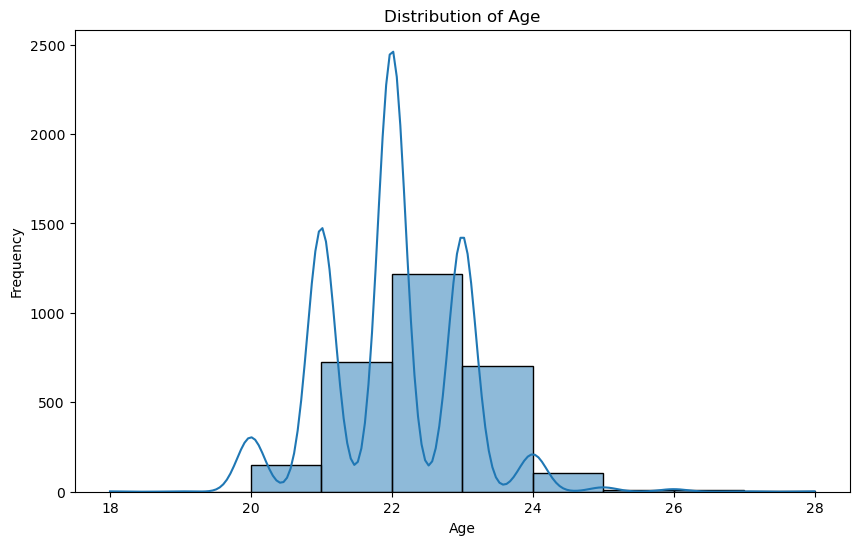

/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


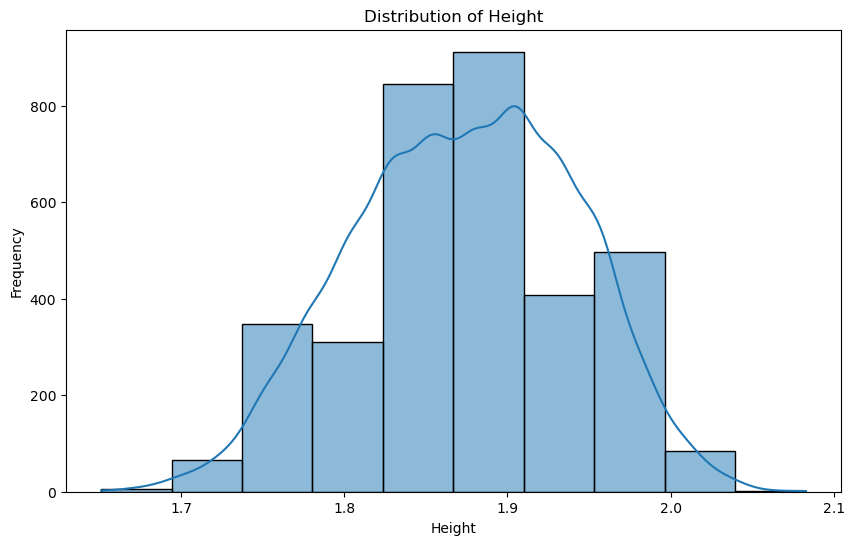

/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


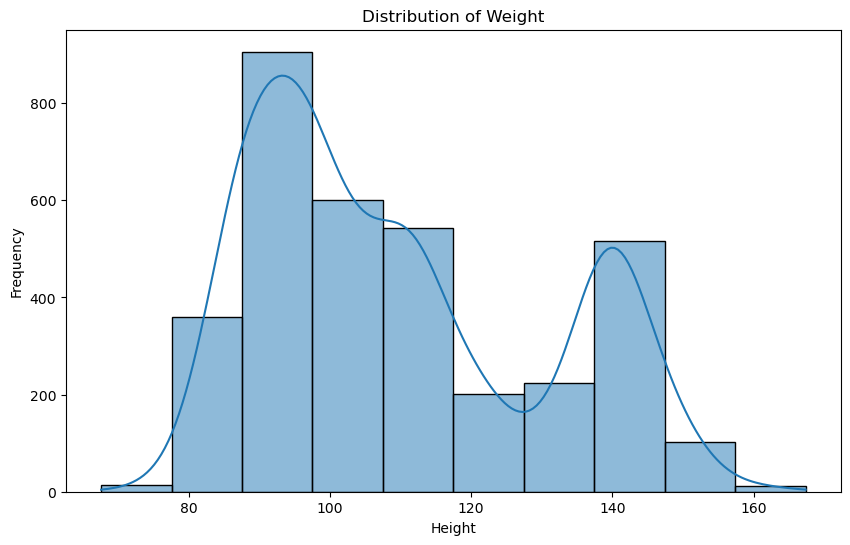

In [8]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Height
plt.figure(figsize=(10, 6))
sns.histplot(data['Height'], bins=10, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

# Distribution of Weight
plt.figure(figsize=(10, 6))
sns.histplot(data['Weight'], bins=10, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

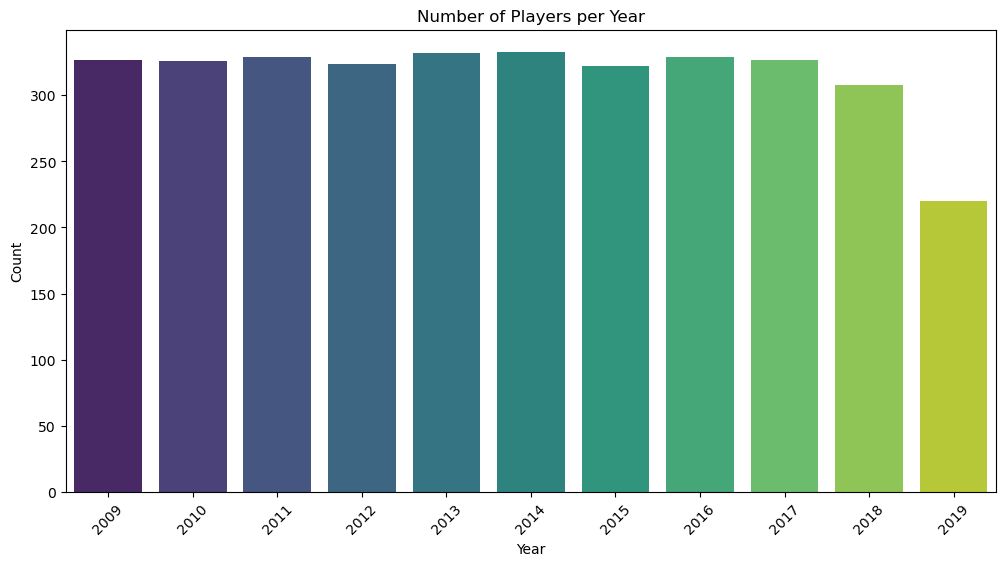

In [9]:

year_counts = data['Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Number of Players per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Extra Plot - Not needed (Same as Jenna's)

# Pair plot of numerical features
#sns.pairplot(data[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'BMI']])
#plt.show()

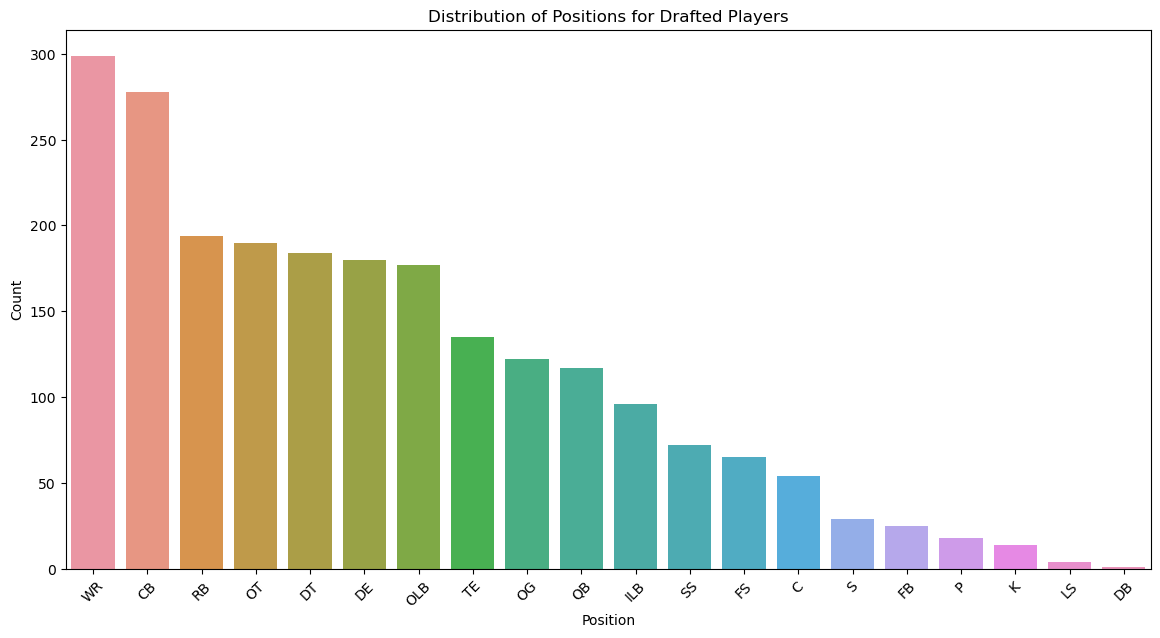

In [11]:
# Filter the data for drafted players
drafted_data = data[data['Drafted'] == 1]

# Bar plot of positions for drafted players
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', data=drafted_data, order=drafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Drafted Players')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

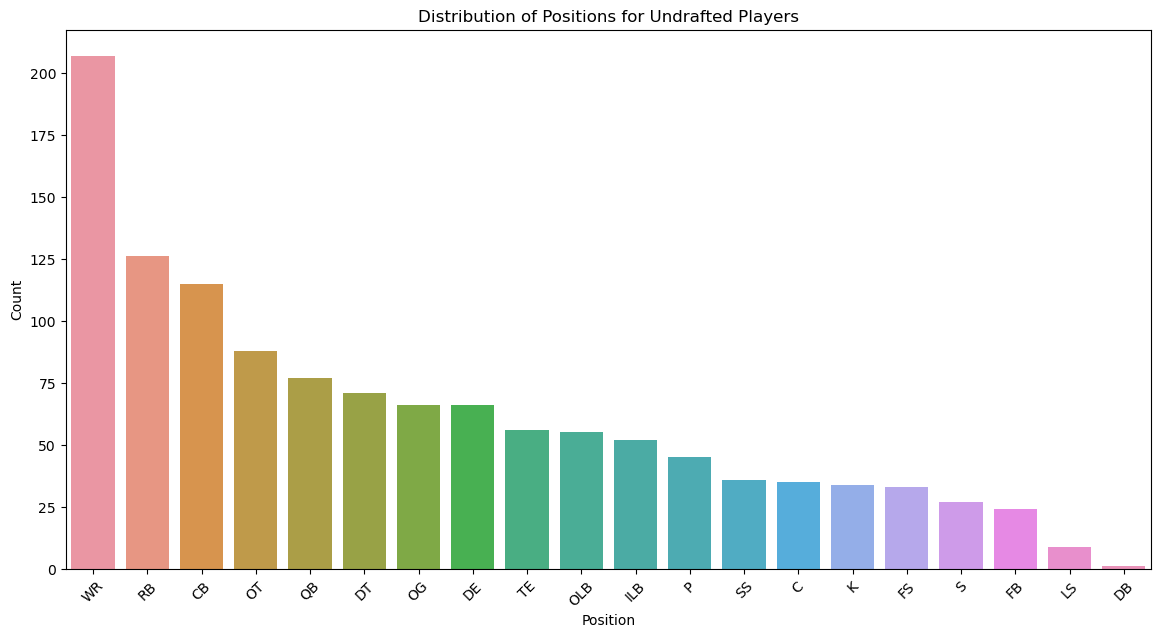

In [12]:
# Filter the data for drafted players
undrafted_data = data[data['Drafted'] == 0]

# Bar plot of positions for drafted players
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', data=undrafted_data, order=undrafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Undrafted Players')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

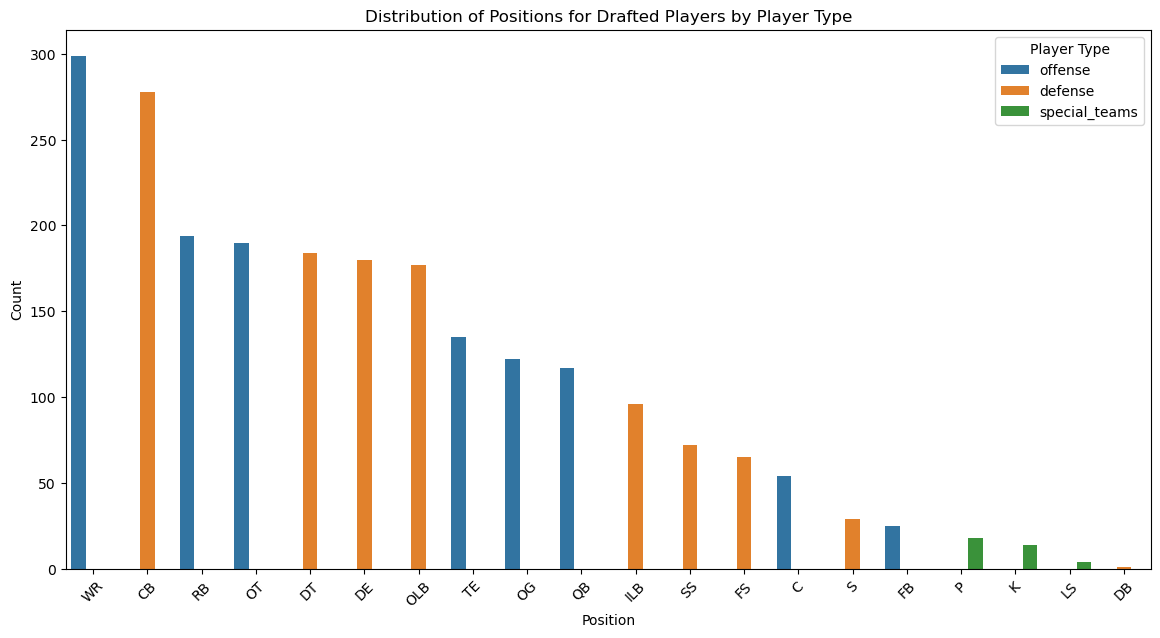

In [13]:
# Bar plot of positions for drafted players with player type
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', hue='Player_Type', data=drafted_data, order=drafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Drafted Players by Player Type')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Player Type')
plt.show()

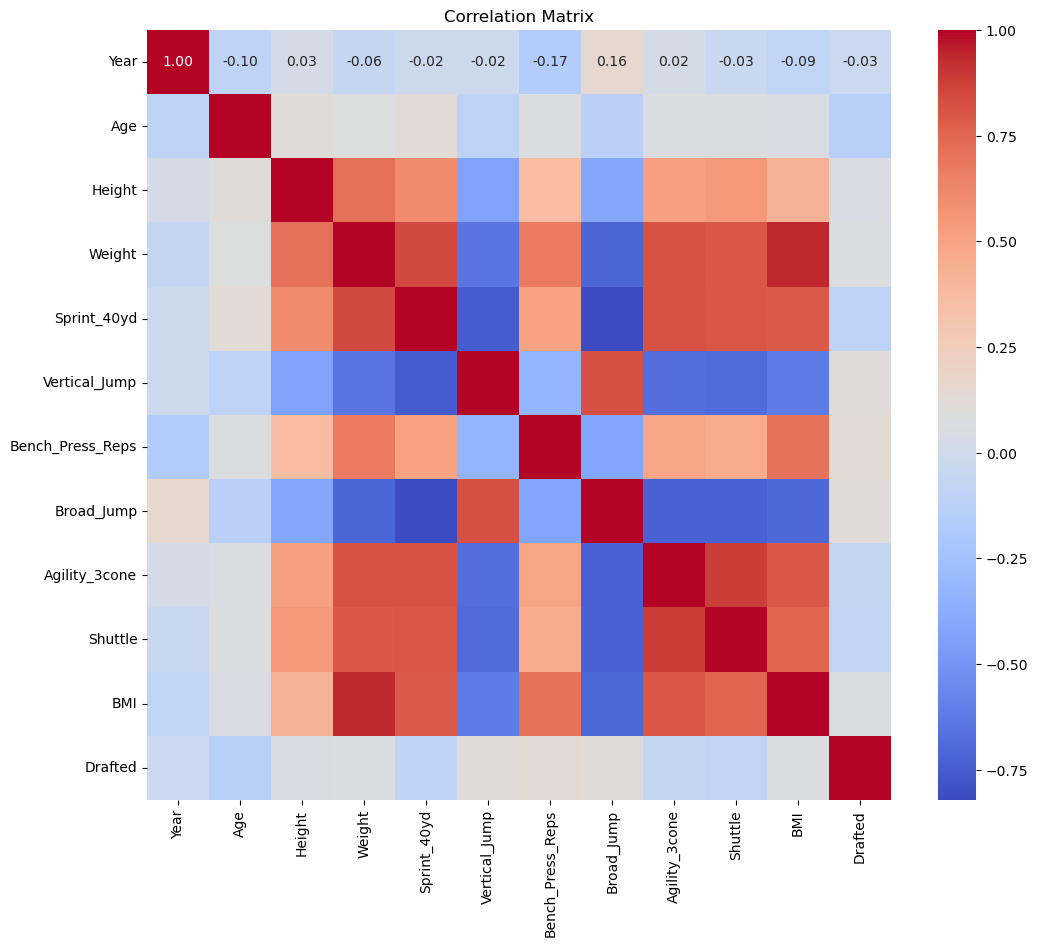

In [14]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


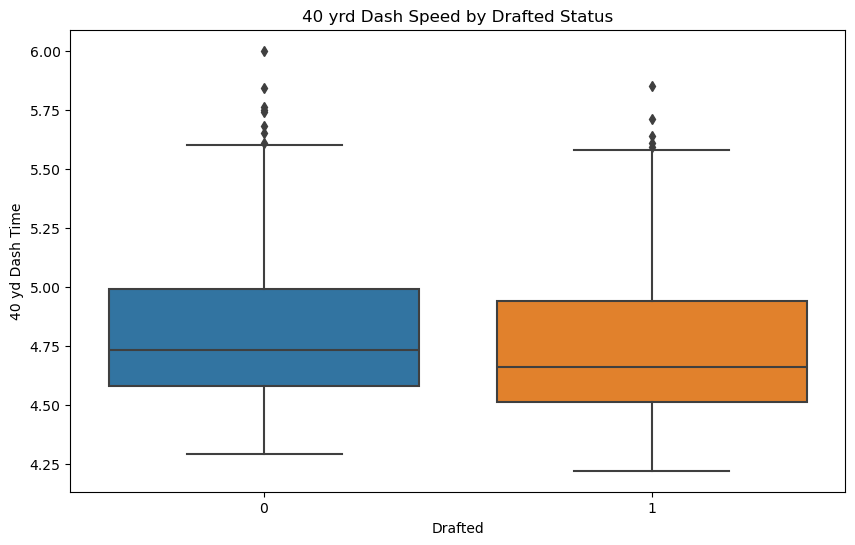

In [15]:
#Jenna Graphs - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drafted', y='Sprint_40yd', data=data)
plt.title('40 yrd Dash Speed by Drafted Status')
plt.xlabel('Drafted')
plt.ylabel('40 yd Dash Time')
plt.show()

/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/seemavora/opt/anaconda3

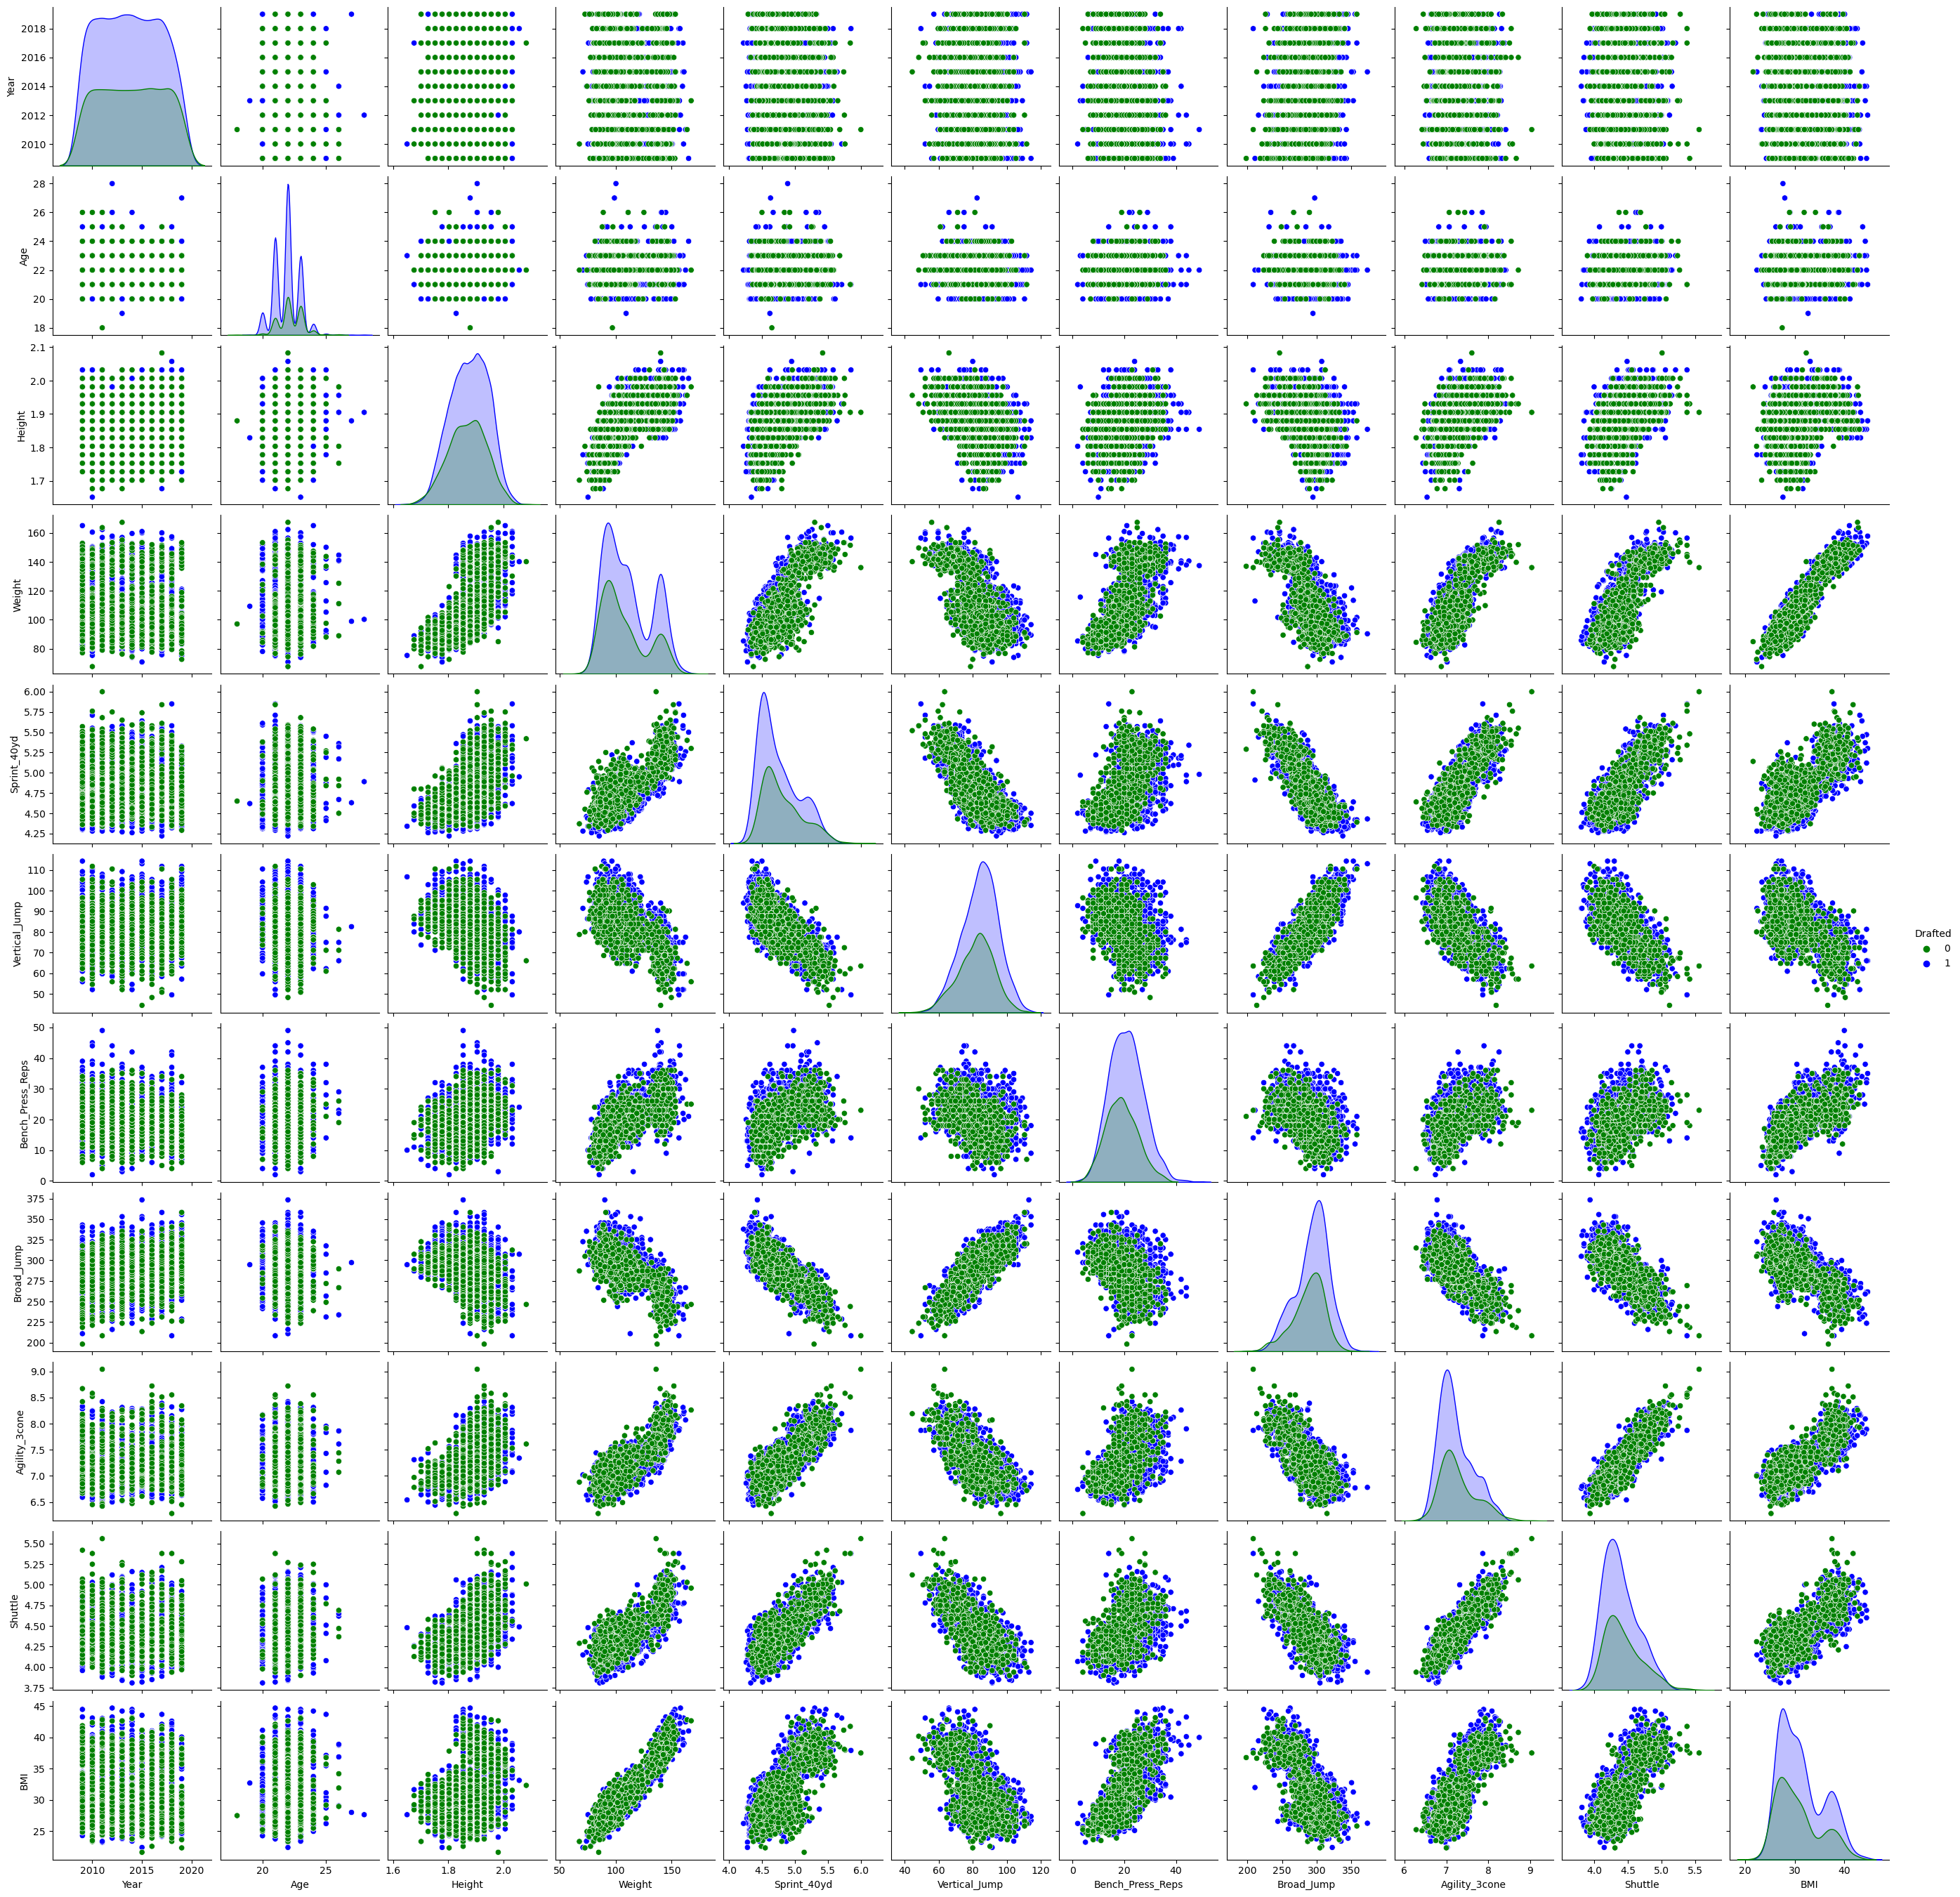

In [16]:
#Jenna Graphs - Pairplot
palette = {1:"blue", 0:"green"}
sns.pairplot(data, hue='Drafted', palette=palette)
plt.show()

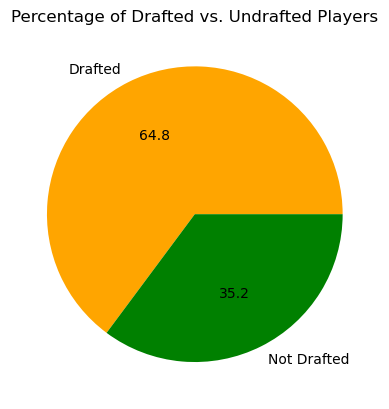

In [17]:
#Jenna Graph
# Looking  at the split in the data between drafted and non drafted
draft_counts = data['Drafted'].value_counts()
labels = ['Drafted', 'Not Drafted']
colors = ['orange', 'green']

plt.pie(draft_counts, labels=labels, colors=colors, autopct='%.1f')
plt.title('Percentage of Drafted vs. Undrafted Players')
plt.show()

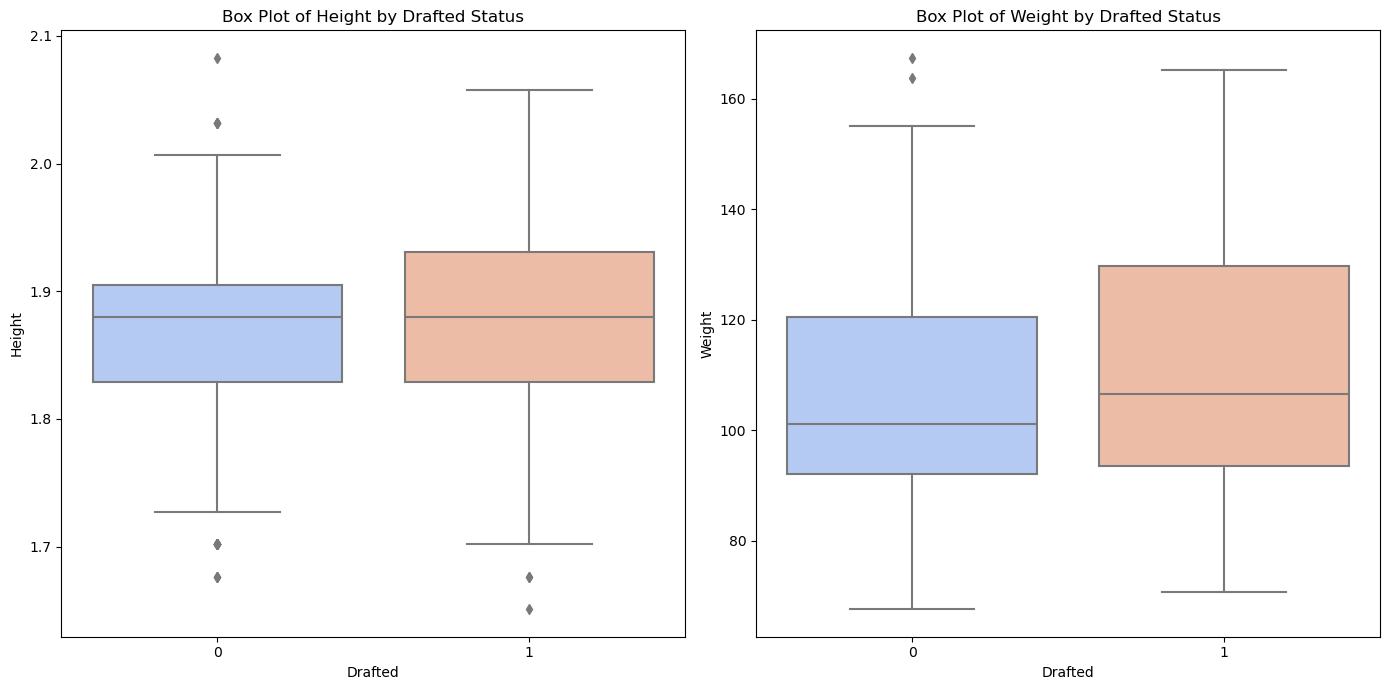

In [18]:
# Seema Graph
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Drafted', y='Height', data=data, palette='coolwarm')
plt.title('Box Plot of Height by Drafted Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Drafted', y='Weight', data=data, palette='coolwarm')
plt.title('Box Plot of Weight by Drafted Status')

plt.tight_layout()
plt.show()

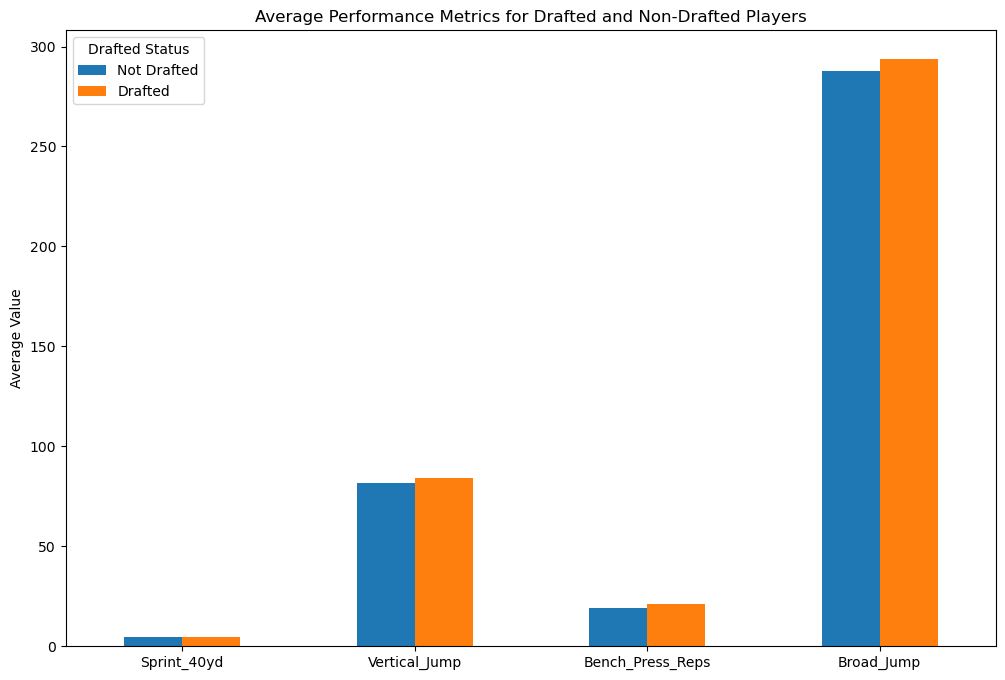

In [19]:
# Seema Graph
average_values = data.groupby('Drafted')[['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump']].mean().T
average_values.columns = ['Not Drafted', 'Drafted']

# Plot the bar chart
average_values.plot(kind='bar', figsize=(12, 8))
plt.title('Average Performance Metrics for Drafted and Non-Drafted Players')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Drafted Status')
plt.show()

# Data Prep for Model with All Data Points 
This model work has been completed by Aditya. 

In [20]:
# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Fill missing numerical values with the median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

#Defining Categorical Columns (String based columns)
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

# Dropping unnecessary columns
data.drop(['Drafted..tm.rnd.yr.'], axis=1, inplace=True)


In [21]:
#Increasing the number of samples for the non drafted as thier was an imbalance in distribution

from sklearn.utils import resample

drafted = data[data['Drafted']==1]
not_drafted = data[data['Drafted']==0]
not_drafted_additional_samples = resample(not_drafted, replace=True, n_samples = len(drafted), random_state = 42)
new_data = pd.concat([drafted, not_drafted_additional_samples])

# Data Splitting and Feature Selection

In [22]:
# Define features and target
X = new_data.drop(columns=['Drafted'])
y = new_data['Drafted']

In [23]:
# Split the data into train, validation, and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state= 42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2524, 17)
Shape of X_val: (631, 17)
Shape of X_test: (1353, 17)
Shape of y_train: (2524,)
Shape of y_val: (631,)
Shape of y_test: (1353,)


In [24]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [25]:
# Encoding the categorical variable for y

y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat = to_categorical(y_val, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)


In [26]:
#Features used in the Aditya's Models
feature_names = data.drop(columns=['Drafted']).columns  # Drop the target column
print("Features used in the model:")
print(feature_names)

Features used in the model:
Index(['Year', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone',
       'Shuttle', 'BMI', 'Player_Type', 'Position_Type', 'Position', 'Name',
       'ID'],
      dtype='object')


# Building the model

## Model 1: Simple Neural Network

In [27]:
# Build a simple neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(2, activation='softmax')  # 2 classes: drafted and not drafted
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_val, y_val_cat),verbose=0)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat,verbose=0)

# Make predictions
y_val_pred = model.predict(X_val)
y_val_pred_classes = y_val_pred.argmax(axis=1)
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat,verbose=0)

# Model Summary
model.summary()

# Training accuracy (using the final epoch training accuracy from history)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

43/43 [==============================] - 0s 497us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               9216      
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 10,242
Trainable params: 10,242
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.9731
Validation Accuracy: 0.7956
Test Accuracy: 0.7931


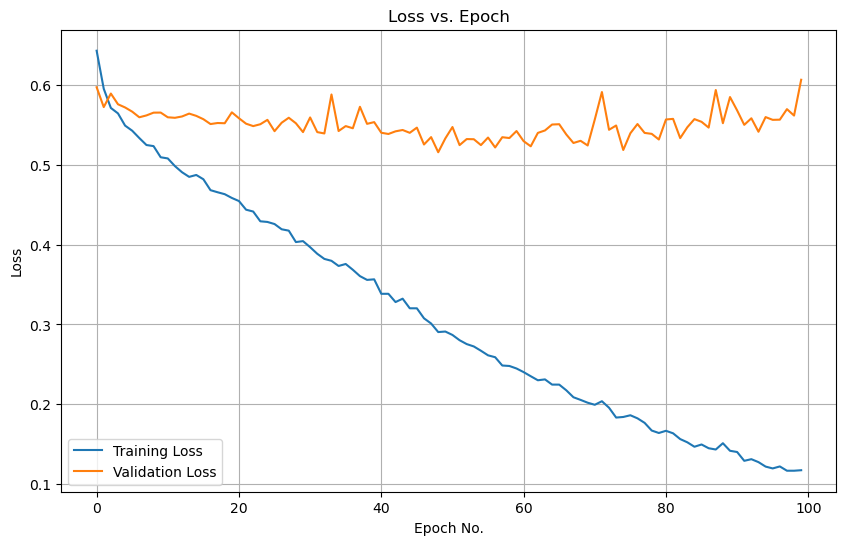

In [28]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Visualizing the predictions vs Actual for Model 1

In [29]:
# Ensure indices are reset to align correctly
X_test = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Make predictions
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Combine the predictions with the actual labels and features for comparison
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_test_pred_classes

# Assuming 'data' has the original indices
test_results['Name'] = data.iloc[test_results.index]['Name']

test_results = test_results[['Actual', 'Predicted']]

# Print a sample of the results
print(test_results.head(15))

43/43 [==============================] - 0s 493us/step
    Actual  Predicted
0        1          1
1        1          0
2        0          0
3        1          1
4        0          1
5        1          1
6        0          0
7        0          0
8        1          0
9        0          0
10       1          1
11       1          0
12       0          0
13       1          0
14       0          0


# Calculating the Accuracy Scores

Test Set Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       652
           1       0.81      0.78      0.80       701

    accuracy                           0.79      1353
   macro avg       0.79      0.79      0.79      1353
weighted avg       0.79      0.79      0.79      1353


Accuracy Score:
0.7930524759793053
Confusion Matrix:


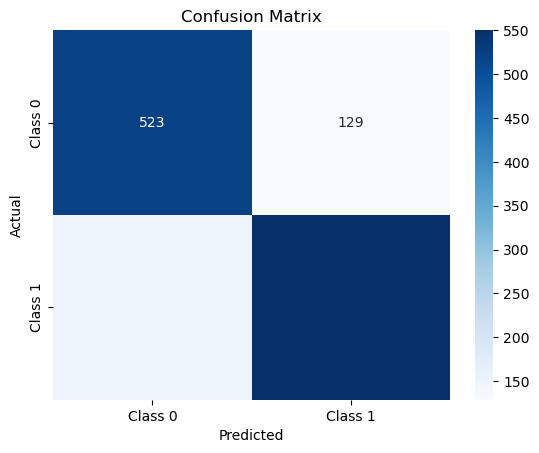

In [30]:

# Print Confusion Matrix and Classification Report
print("Test Set Evaluation")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred_classes))

print("Confusion Matrix:")
cm1 = confusion_matrix(y_test, y_test_pred_classes)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Model 2: Logistic Regression

In [31]:
# Model 2 - Logistic Regression

# Initialize the logistic regression model
num_features = X_train.shape[1]
learning_rate = 0.01

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(
    units=1,        # output dim
    input_shape=(num_features,),  # input dim
    use_bias=True,               # use a bias (intercept) param
    activation='sigmoid',
    kernel_initializer=tf.keras.initializers.Ones(),  # initialize params to 1
    bias_initializer=tf.keras.initializers.Ones(),    # initialize bias to 1
))

# Choose an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Compile the model
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), verbose=0)

#Model Summary
model2.summary()

print("Evaluating the results now:")
# Evaluate the model on the training set
train_loss2, train_accuracy2 = model2.evaluate(X_train, y_train,verbose=0)
print(f"Training Accuracy: {train_accuracy2:.4f}")

# Evaluate the model on the validation set
val_loss2, val_accuracy2 = model2.evaluate(X_val, y_val,verbose=0)
print(f"Validation Accuracy: {val_accuracy2:.4f}")

# Evaluate the model on the test set
test_loss2, test_accuracy2= model2.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy2:.4f}")



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
Evaluating the results now:
Training Accuracy: 0.6414
Validation Accuracy: 0.6910
Test Accuracy: 0.6282


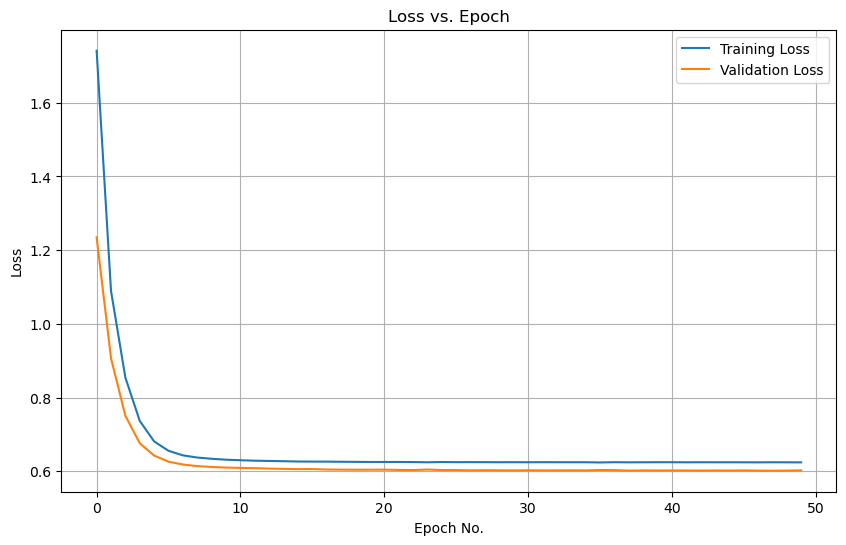

In [32]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

 ## Visualizing the predictions vs Actual for Model 2

In [33]:
# Ensure indices are reset to align correctly
X_test = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Make predictions for model2
y_test_pred_prob2 = model2.predict(X_test)
y_test_pred_classes2 = (y_test_pred_prob2 > 0.5).astype("int32")

# Combine the predictions with the actual labels and features for comparison for model2
test_results2 = X_test.copy()
test_results2['Actual'] = y_test
test_results2['Predicted'] = y_test_pred_classes2

# Assuming 'data' has the original indices
test_results2['Name'] = data.iloc[test_results2.index]['Name']

# Select relevant columns
test_results2 = test_results2[['Actual', 'Predicted']]

# Print a sample of the results
print(test_results2.head(15))

43/43 [==============================] - 0s 464us/step
    Actual  Predicted
0        1          1
1        1          0
2        0          1
3        1          0
4        0          1
5        1          1
6        0          0
7        0          0
8        1          1
9        0          0
10       1          1
11       1          0
12       0          0
13       1          0
14       0          0


## Calculating the Accuracy Score

Test Set Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       652
           1       0.64      0.63      0.64       701

    accuracy                           0.63      1353
   macro avg       0.63      0.63      0.63      1353
weighted avg       0.63      0.63      0.63      1353


Accuracy Score:
0.6282335550628233
Confusion Matrix:


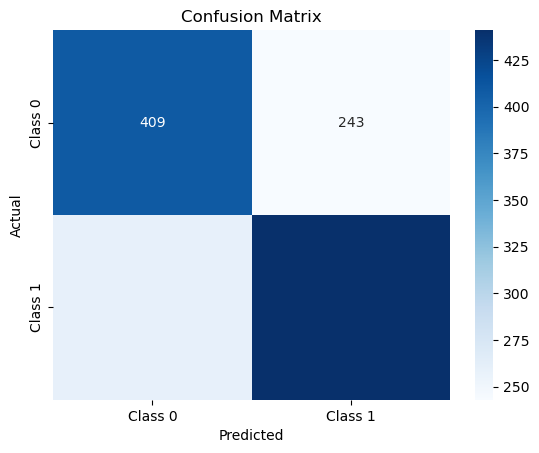

In [34]:
# Print Confusion Matrix and Classification Report
print("Test Set Evaluation")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes2))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred_classes2))
print("Confusion Matrix:")
cm2 = confusion_matrix(y_test, y_test_pred_classes2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Extra Plots

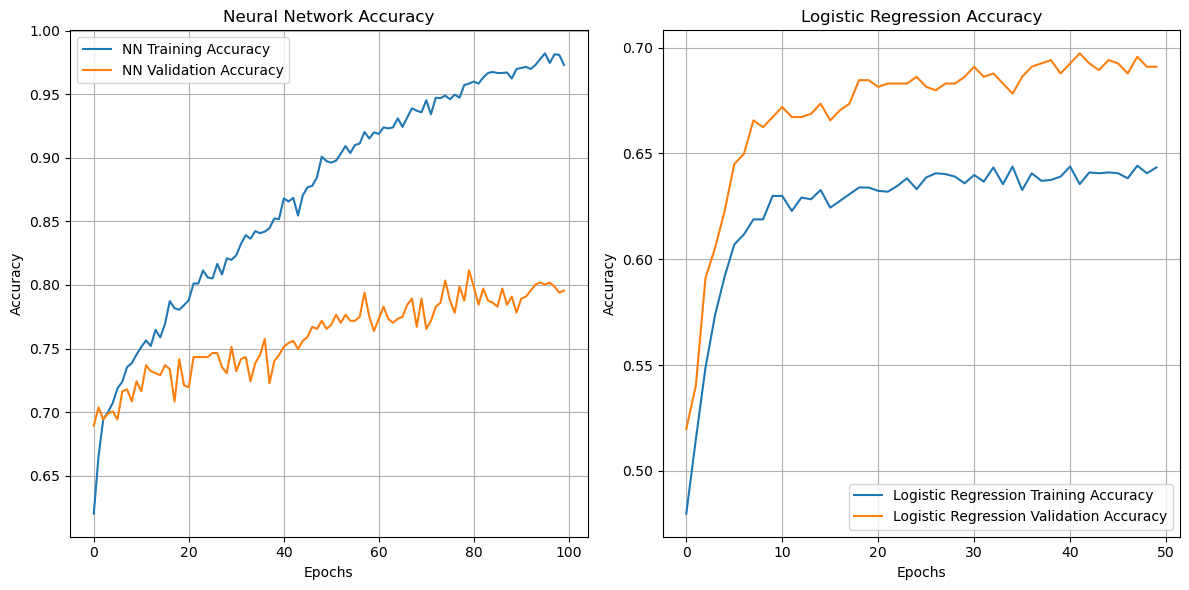

In [35]:
# Plotting the accuracies for both models
plt.figure(figsize=(12, 6))

# Neural Network Model
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='NN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='NN Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Logistic Regression Model
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Logistic Regression Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Logistic Regression Validation Accuracy')
plt.title('Logistic Regression Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

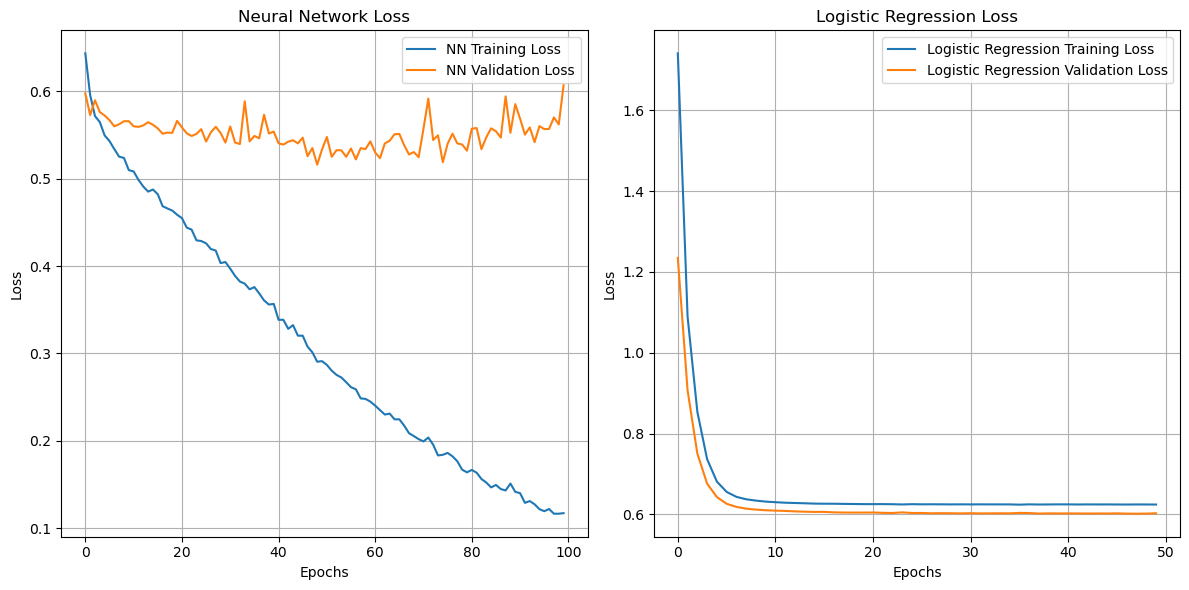

In [36]:
# Plotting the losses for both models
plt.figure(figsize=(12, 6))

# Neural Network Model
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='NN Training Loss')
plt.plot(history.history['val_loss'], label='NN Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Logistic Regression Model
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Logistic Regression Training Loss')
plt.plot(history2.history['val_loss'], label='Logistic Regression Validation Loss')
plt.title('Logistic Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Model 3 - CNN

In [37]:
# Convert to NumPy arrays
X_train_np = np.array(X_train)
X_val_np = np.array(X_val)
X_test_np = np.array(X_test)

# Reshape the input data to be 3D
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_val_reshaped = X_val_np.reshape((X_val_np.shape[0], X_val_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

model3 = Sequential([
    Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history3 = model3.fit(X_train_reshaped, y_train_cat, epochs=100, batch_size=64, validation_data=(X_val_reshaped, y_val_cat),verbose=0)

#Model Summary
model3.summary()

# Evaluate the model on the validation set
val_loss3, val_accuracy3 = model3.evaluate(X_val_reshaped, y_val_cat)

# Make predictions
y_test_pred3 = model3.predict(X_test_reshaped)
y_test_pred_classes3 = y_test_pred3.argmax(axis=1)

# Evaluate the model on the test set
test_loss3, test_accuracy3 = model3.evaluate(X_test_reshaped, y_test_cat)

# Training accuracy (using the final epoch training accuracy from history)
train_accuracy3 = history3.history['accuracy'][-1]

print(f"Training Accuracy: {train_accuracy3:.4f}")
print(f"Validation Accuracy: {val_accuracy3:.4f}")
print(f"Test Accuracy: {test_accuracy3:.4f}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15, 512)           2048      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 512)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3584)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1835520   
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                      

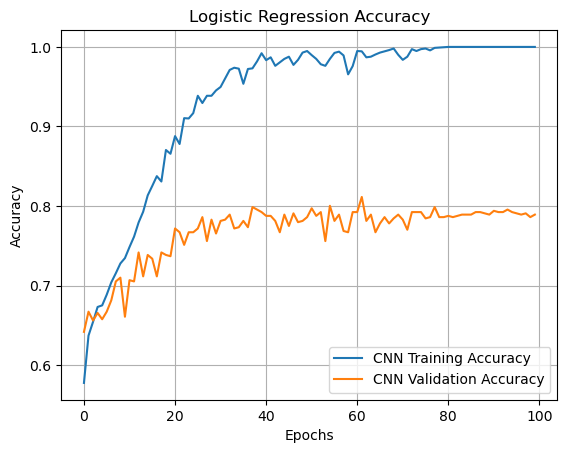

In [38]:
plt.plot(history3.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Logistic Regression Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

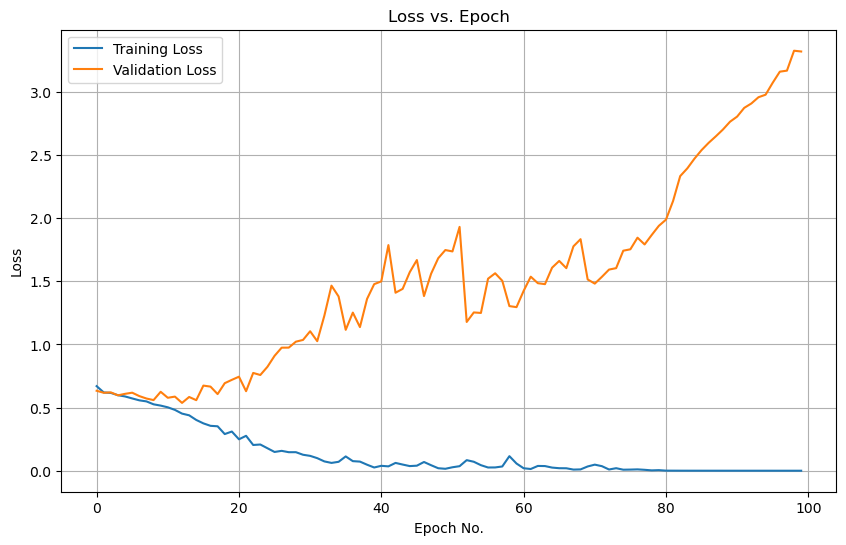

In [39]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Visualizing the predictions vs Actual for Model 3

In [40]:
# Combine the predictions with the actual labels and features for comparison
test_results3 = pd.DataFrame(X_test, columns=X.columns)
test_results3['Actual'] = y_test
test_results3['Predicted'] = y_test_pred_classes3
test_results3['Name'] = data.loc[test_results3.index, 'Name']

test_results3 = test_results3[[ 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results3.head(15))

    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        0          0
5        1          1
6        0          0
7        0          0
8        1          1
9        0          1
10       1          1
11       1          1
12       0          0
13       1          0
14       0          0


## Calculating the Accuracy Score

Accuracy: 0.7775
Precision: 0.8279
Recall: 0.7204
F1 Score: 0.7704

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.78       652
           1       0.83      0.72      0.77       701

    accuracy                           0.78      1353
   macro avg       0.78      0.78      0.78      1353
weighted avg       0.78      0.78      0.78      1353



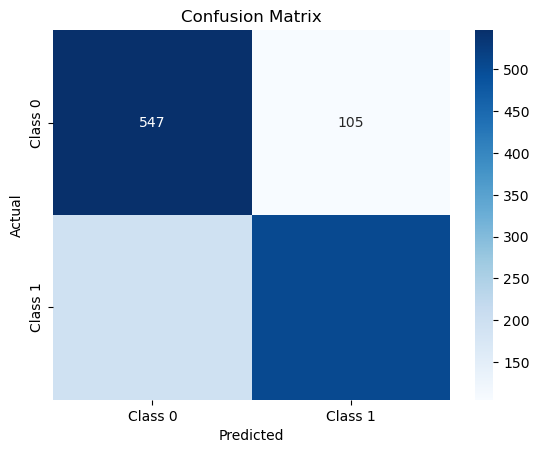

In [41]:

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_test_pred_classes3)
precision = precision_score(y_test, y_test_pred_classes3)
recall = recall_score(y_test, y_test_pred_classes3)
f1 = f1_score(y_test, y_test_pred_classes3)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_classes3))

#Confusion Matrix
cm3 = confusion_matrix(y_test, y_test_pred_classes3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



## Model 4 - Random Forest

Training Accuracy: 0.9992
Validation Accuracy: 0.8732
Test Accuracy: 0.8463

Important Scores:
Precision: 0.8729
Recall: 0.8231
F1 Score: 0.8473


/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


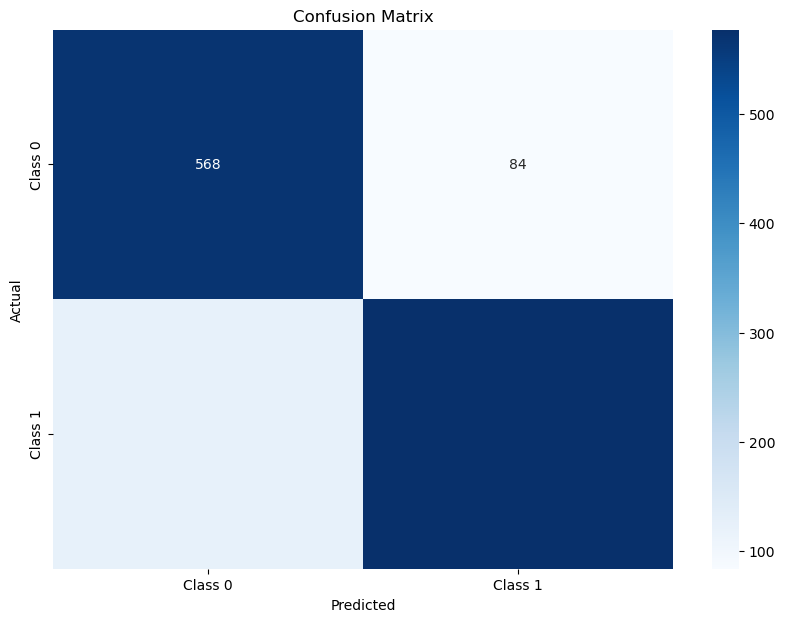

In [42]:
# Initialize the Random Forest model
model4 = RandomForestClassifier(max_depth=15,random_state=42)

# Train the model
model4.fit(X_train, y_train)

# Make predictions
y_train_pred4 = model4.predict(X_train)
y_val_pred4 = model4.predict(X_val)
y_test_pred4 = model4.predict(X_test)

# Evaluate the model
train_accuracy4 = accuracy_score(y_train, y_train_pred4)
val_accuracy4 = accuracy_score(y_val, y_val_pred4)
test_accuracy4 = accuracy_score(y_test, y_test_pred4)

precision4 = precision_score(y_test, y_test_pred4)
recall4 = recall_score(y_test, y_test_pred4)
f1_score4 = f1_score(y_test, y_test_pred4)

# Print the evaluation results
print(f"Training Accuracy: {train_accuracy4:.4f}")
print(f"Validation Accuracy: {val_accuracy4:.4f}")
print(f"Test Accuracy: {test_accuracy4:.4f}")

print("")
print("Important Scores:")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")
print(f"F1 Score: {f1_score4:.4f}")

# Confusion Matrix
cm4 = confusion_matrix(y_test, y_test_pred4)
plt.figure(figsize=(10, 7))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Visualizing the Predictions vs Actual for Model 4

In [43]:
# Make predictions on the test set
y_test_pred4 = model4.predict(X_test)

# Combine the predictions with the actual labels and features for comparison
test_results4 = pd.DataFrame(X_test, columns=X.columns)
test_results4['Actual'] = y_test
test_results4['Predicted'] = y_test_pred4

# Assuming 'data' has the original indices
test_results4['Name'] = data.iloc[test_results4.index]['Name']

# Select relevant columns for display
test_results4 = test_results4[['Actual', 'Predicted']]

# Print a sample of the results
print(test_results4.sample(15))

      Actual  Predicted
1218       1          1
188        0          1
346        0          0
300        0          0
965        1          1
195        0          0
612        1          1
157        1          1
1027       1          1
277        0          0
179        1          1
74         1          1
165        1          1
1091       1          1
1018       0          0


/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [44]:
# Feature importance
importances = model4.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
             Feature  Importance
16                ID    0.179165
5        Sprint_40yd    0.093296
4             Weight    0.070562
1                Age    0.070331
15              Name    0.070012
11               BMI    0.069782
2             School    0.057767
7   Bench_Press_Reps    0.050483
6      Vertical_Jump    0.049995
8         Broad_Jump    0.049726
9      Agility_3cone    0.048311
10           Shuttle    0.046664
3             Height    0.045000
0               Year    0.042999
14          Position    0.030643
12       Player_Type    0.012876
13     Position_Type    0.012388


## Calculation all 4 Model Accuracies 

In [45]:
# Create a dictionary to store the results
results = {
    'Model': ['Neural Network', 'Logistic Regression', 'CNN', 'Random Forest'],
    'Training Accuracy': [train_accuracy, train_accuracy2, train_accuracy3, train_accuracy4],
    'Validation Accuracy': [val_accuracy, val_accuracy2, val_accuracy3, val_accuracy4],
    'Test Accuracy': [test_accuracy, test_accuracy2, test_accuracy3, test_accuracy4]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                 Model  Training Accuracy  Validation Accuracy  Test Accuracy
0       Neural Network           0.973059             0.795563       0.793052
1  Logistic Regression           0.641442             0.690967       0.628234
2                  CNN           1.000000             0.789223       0.777531
3        Random Forest           0.999208             0.873217       0.846268


# Jenna Code

In [46]:
#selecting metrics 
j_data = new_data[['Height', 'Vertical_Jump', 'Sprint_40yd','Drafted']]
print(j_data['Drafted'].value_counts())
drop = j_data.dropna()
print(drop['Drafted'].value_counts())
#rebalancing the smaller dataset to be balanced after dropping nas
drafted_1 = drop[drop['Drafted'] == 1]
drafted_0 = drop[drop['Drafted'] == 0]

drafted_0_additional = resample(drafted_0, replace=True, n_samples = len(drafted_1), random_state = 42)
balanced_data = pd.concat([drafted_0_additional, drafted_1])

balanced_data

Drafted
1    2254
0    2254
Name: count, dtype: int64
Drafted
1    2254
0    2254
Name: count, dtype: int64


Height  Vertical_Jump  Sprint_40yd  Drafted
3414  1.9050          80.01         4.69        0
3192  1.8034         110.49         4.69        0
3430  1.8288          87.63         4.63        0
3187  1.9558          68.58         4.84        0
3258  2.0066          66.04         5.61        0
...      ...            ...          ...      ...
2249  1.9304          57.15         5.20        1
2250  1.8288          95.25         4.35        1
2251  1.7526          83.82         4.69        1
2252  1.9050          72.39         5.04        1
2253  1.8796          82.55         4.60        1

[4508 rows x 4 columns]

In [47]:
#split data into x and y
X = balanced_data.drop(columns=['Drafted'])
y = balanced_data['Drafted']
#train, val, test  split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state= 42)

print("Training Data Size:", X_train.shape)
print("Validation Data Size:", X_val.shape)
print("Test Data Size:", X_test.shape)

Training Data Size: (2524, 3)
Validation Data Size: (631, 3)
Test Data Size: (1353, 3)


In [48]:
training_mean_x = np.mean(X_train, axis = 0)
training_std_x = np.std(X_train, axis = 0)
#standardize X values
X_train_1 = (X_train-training_mean_x)/training_std_x
X_val_1 = (X_val-training_mean_x)/training_std_x
X_test_1= (X_test-training_mean_x)/training_std_x

In [49]:
# If we want to use StandardScaler function from Sklearn

# Initialize the StandardScaler
#scaler = StandardScaler()

# Fit the scaler on the training data and transform it
#X_train_1 = scaler.fit_transform(X_train)

# Use the same scaler to transform the validation and test sets
#X_val_1 = scaler.transform(X_val)
#X_test_1 = scaler.transform(X_test)

## Jenna's Model 1: Linear Regression

In [50]:
def build_model(num_features, learning_rate):
 
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        
      input_shape=[num_features],  
      use_bias=True,              
      activation="sigmoid",
      kernel_initializer=tf.ones_initializer,  
      bias_initializer=tf.ones_initializer,    
  ))

  optimizer = tf.keras.optimizers.SGD(learning_rate= learning_rate)

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics =['binary_accuracy'])
    
  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Evaluating the results now:
Training Accuracy: 0.5182
Validation Accuracy: 0.4960
Test Accuracy: 0.4974


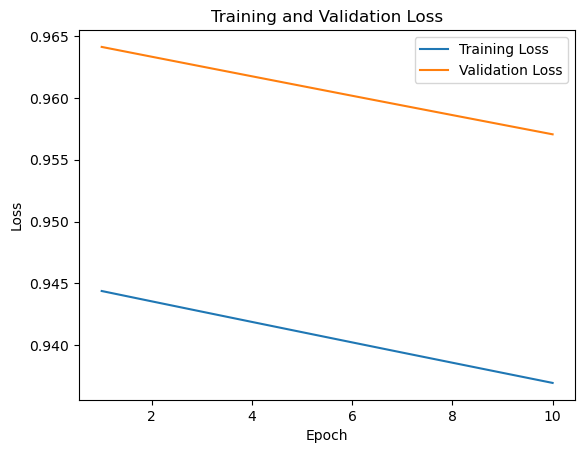

In [51]:
tf.random.set_seed(0)
model_j1 = build_model(num_features = X_train_1.shape[1], learning_rate = 0.0001)

fit_j1 = model_j1.fit(x = X_train_1, y = y_train, validation_data = (X_val_1,y_val), epochs = 10, batch_size = 32, verbose = 0)


#Model Summary
model_j1.summary()

print("Evaluating the results now:")
# Evaluate the model on the training set
train_lossj1, train_accuracyj1 = model_j1.evaluate(X_train_1, y_train,verbose=0)
print(f"Training Accuracy: {train_accuracyj1:.4f}")

# Evaluate the model on the validation set
val_lossj1, val_accuracyj1 = model_j1.evaluate(X_val_1, y_val,verbose=0)
print(f"Validation Accuracy: {val_accuracyj1:.4f}")

# Evaluate the model on the test set
test_lossj1, test_accuracyj1= model_j1.evaluate(X_test_1, y_test,verbose=0)
print(f"Test Accuracy: {test_accuracyj1:.4f}")

loss_train = fit_j1.history['loss']
loss_val = fit_j1.history['val_loss']
epoch = np.arange(1,len(loss_train)+1)
plt.plot(epoch,loss_train,label = 'Training Loss')
plt.plot(epoch,loss_val,label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



## Jenna's Model 2 - Tuned Linear Regression Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Evaluating the results now:
Training Accuracy: 0.5777
Validation Accuracy: 0.5721
Test Accuracy: 0.5625


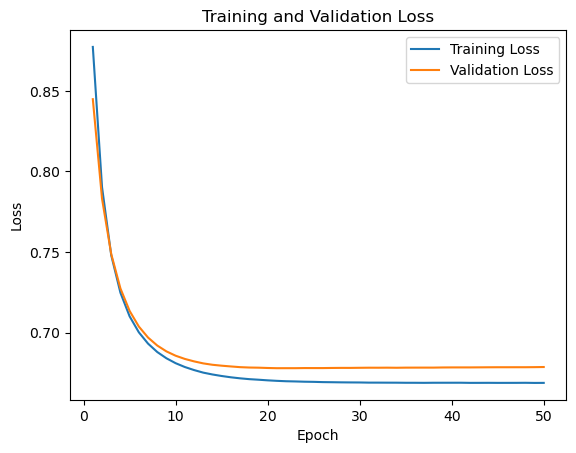

In [52]:
tf.random.set_seed(0)
model_j2= build_model(num_features = X_train_1.shape[1], learning_rate = 0.02)
fit_j2 = model_j2.fit(x= X_train_1, y=y_train, validation_data = (X_val_1,y_val), epochs = 50, verbose = 0)

#Model Summary
model_j2.summary()

print("Evaluating the results now:")
# Evaluate the model on the training set
train_lossj2, train_accuracyj2 = model_j2.evaluate(X_train_1, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracyj2:.4f}")

# Evaluate the model on the validation set
val_lossj2, val_accuracyj2 = model_j2.evaluate(X_val_1, y_val,verbose=0)
print(f"Validation Accuracy: {val_accuracyj2:.4f}")

# Evaluate the model on the test set
test_lossj2, test_accuracyj2= model_j2.evaluate(X_test_1, y_test,verbose=0)
print(f"Test Accuracy: {test_accuracyj2:.4f}")

loss_train = fit_j2.history['loss']
loss_val = fit_j2.history['val_loss']
epoch = np.arange(1,len(loss_train)+1)
plt.plot(epoch,loss_train,label = 'Training Loss')
plt.plot(epoch,loss_val,label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Jenna's Model 3 - Random Forest

Training Accuracy: 0.9433
Validation Accuracy: 0.7480
Test Accuracy: 0.7635
Precision: 0.7862
Recall: 0.6994
F1 Score: 0.7403


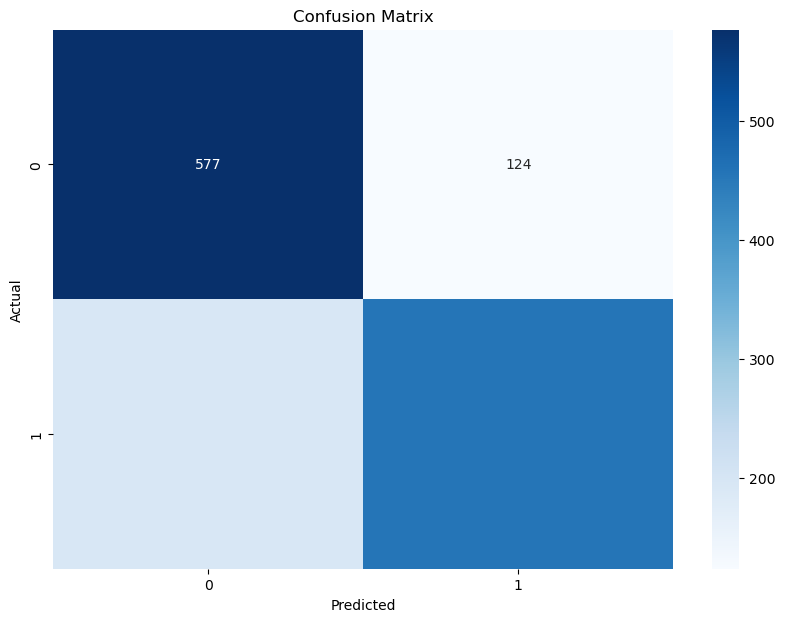

In [53]:
#Random Forest With Limited Metrics
# Initialize the Random Forest model

model_j3 = RandomForestClassifier(max_depth=15,random_state=42)

# Train the model
model_j3.fit(X_train_1, y_train)

# Make predictions
y_train_j3 = model_j3.predict(X_train_1)
y_val_j3 = model_j3.predict(X_val_1)
y_test_j3 = model_j3.predict(X_test_1)

# Evaluate the model
train_accuracy_j3 = accuracy_score(y_train, y_train_j3)
val_accuracy_j3 = accuracy_score(y_val, y_val_j3)
test_accuracy_j3 = accuracy_score(y_test, y_test_j3)

precision_j3 = precision_score(y_test, y_test_j3)
recall_j3 = recall_score(y_test, y_test_j3)
f1_score_j3 = f1_score(y_test, y_test_j3)

# Print the evaluation results
print(f"Training Accuracy: {train_accuracy_j3:.4f}")
print(f"Validation Accuracy: {val_accuracy_j3:.4f}")
print(f"Test Accuracy: {test_accuracy_j3:.4f}")
print(f"Precision: {precision_j3:.4f}")
print(f"Recall: {recall_j3:.4f}")
print(f"F1 Score: {f1_score_j3:.4f}")

# Confusion Matrix
conf_matrix_j3 = confusion_matrix(y_test, y_test_j3)
#print("Confusion Matrix:")
#print(conf_matrix_j3)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_j3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Seema's Code
Seema's model focuses on: Height, Weight, BMI, Vertical_Jump, and Broad_Jump

###  Cleaning Data and Encorporating Only Relevant Columns

In [54]:
dataS = pd.read_csv('./NFL.csv')
dataS['Drafted'] = dataS['Drafted'].map({'Yes': 1, 'No': 0}).astype('int')
dataS = dataS[['Height', 'Weight', 'BMI', 'Vertical_Jump', 'Broad_Jump', 'Drafted']]
print(dataS['Drafted'].value_counts())

drop = dataS.dropna()

print("Data after NAN drop:",drop['Drafted'].value_counts())

drafted_1 = dataS[dataS['Drafted'] == 1]
drafted_0 = dataS[dataS['Drafted'] == 0]

drafted_1_sampled = drafted_1.sample(n=906, random_state=42)

balanced_dataS = pd.concat([drafted_1_sampled, drafted_0])

balanced_dataS = balanced_dataS.sample(frac=1, random_state=42).reset_index(drop=True)

print("Data after balancing:",balanced_dataS['Drafted'].value_counts())

Drafted
1    2254
0    1223
Name: count, dtype: int64
Data after NAN drop: Drafted
1    1793
0     906
Name: count, dtype: int64
Data after balancing: Drafted
0    1223
1     906
Name: count, dtype: int64


In [55]:
#dataS = new_data[['Height', 'Weight', 'BMI', 'Vertical_Jump', 'Broad_Jump', 'Drafted']]
#print(dataS['Drafted'].value_counts())

#drop = dataS.dropna()

#print("Data after NAN drop:",drop['Drafted'].value_counts())

#balanced_dataS = dataS

#print("Data after balancing:",balanced_dataS['Drafted'].value_counts())

### Data Prep: Balancing the Data, Shuffling Index, Data Split, & Standardization

In [56]:
index = balanced_dataS.index.to_list()
print(balanced_dataS.shape)
shuffled_index = np.random.permutation(index)
print('Shuffled Index: ', shuffled_index)
#balanced_dataS = balanced_dataS.reindex(shuffled_index)
balanced_dataS = balanced_dataS.dropna()
print(balanced_dataS.shape)

(2129, 6)
Shuffled Index:  [1150  782 1172 ...  609  587  126]
(1634, 6)


In [57]:
Y = balanced_dataS[['Drafted']]
print('Shape of Y: ', Y.shape)
X = balanced_dataS[['Height', 'Weight', 'BMI', 'Vertical_Jump', 'Broad_Jump']].dropna()
print('Shape of X: ', X.shape)

Shape of Y:  (1634, 1)
Shape of X:  (1634, 5)


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of Y_val: ", Y_val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (980, 5)
Shape of Y_train:  (980, 1)
Shape of X_val:  (327, 5)
Shape of Y_val:  (327, 1)
Shape of X_test:  (327, 5)
Shape of Y_test:  (327, 1)


In [59]:
X_train_quantiles = X_train.quantile([0.25, 0.5, 0.75, 0.95])

mean = X_train.mean()
std = X_train.std()
X_train_std = (X_train - mean) /std
X_val_std = (X_val - mean) /std
X_test_std = (X_test - mean) /std

mean = Y_train.mean()
std = Y_train.std()
Y_train_std = (Y_train - mean) /std
Y_val_std = (Y_val - mean) /std
Y_test_std = (Y_test - mean) /std

### Model 1: Linear Regression

In [60]:
# Model #1: 
import tensorflow as tf

def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """

  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # output dim
      input_shape=[num_features],  # input dim
      use_bias=True,               # use a bias (intercept) param
      kernel_initializer=tf.ones_initializer,  # initialize params to 1
      bias_initializer=tf.ones_initializer    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use GD, which is actually mini-batch GD
  optimizer =  tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. This finalizes the graph for training.
  # We specify the loss and the optimizer above
  model.compile(
        optimizer=optimizer,
        loss='mse', 
        metrics = ['accuracy']
  )
    
  return model

Training Accuracy: 0.6071428656578064
Validation Accuracy: 0.4587155878543854
Test Accuracy: 0.5963302850723267


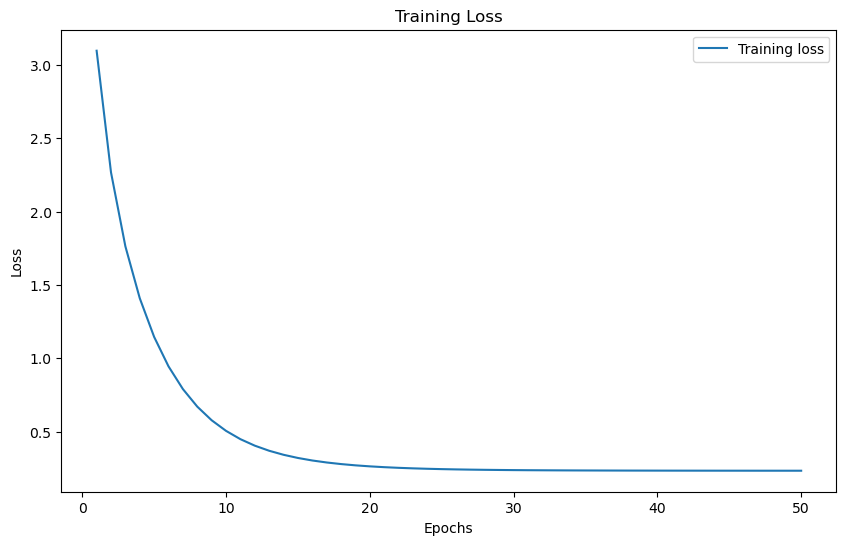

In [61]:
tf.random.set_seed(0)

model_sv1 = build_model(
        num_features=X_train_std.shape[1],
        learning_rate=.0001)

# 3. Fit the model
baseline_fit_sv1 = model_sv1.fit(
      x = X_train_std,
      y = Y_train,
      validation_data=(X_val_std, Y_val),
      epochs=50,
      batch_size=1, #use all the data
      verbose=0)

#4
loss_sv1 = baseline_fit_sv1.history['loss']
epochs_sv1 = range(1, len(loss_sv1) + 1)
#print(loss_sv1)

train_loss_sv1, train_accuracy_sv1 = model_sv1.evaluate(X_train_std, Y_train, verbose = 0)
val_loss_sv1, val_accuracy_sv1 = model_sv1.evaluate(X_val, Y_val, verbose=0)
test_loss_sv1, test_accuracy_sv1 = model_sv1.evaluate(X_test_std, Y_test, verbose = 0)

print("Training Accuracy:", train_accuracy_sv1)
print("Validation Accuracy:", val_accuracy_sv1)
print("Test Accuracy:", test_accuracy_sv1)


plt.figure(figsize=(10, 6))
plt.plot(epochs_sv1, loss_sv1, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

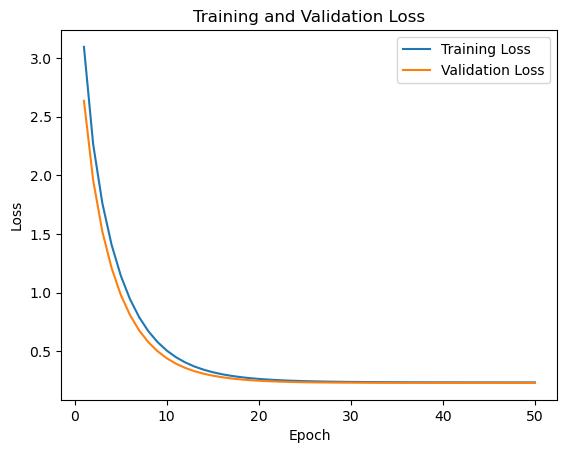

In [62]:
loss_train = baseline_fit_sv1.history['loss']
loss_val = baseline_fit_sv1.history['val_loss']
epoch = np.arange(1,len(loss_train)+1)
plt.plot(epoch,loss_train,label = 'Training Loss')
plt.plot(epoch,loss_val,label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

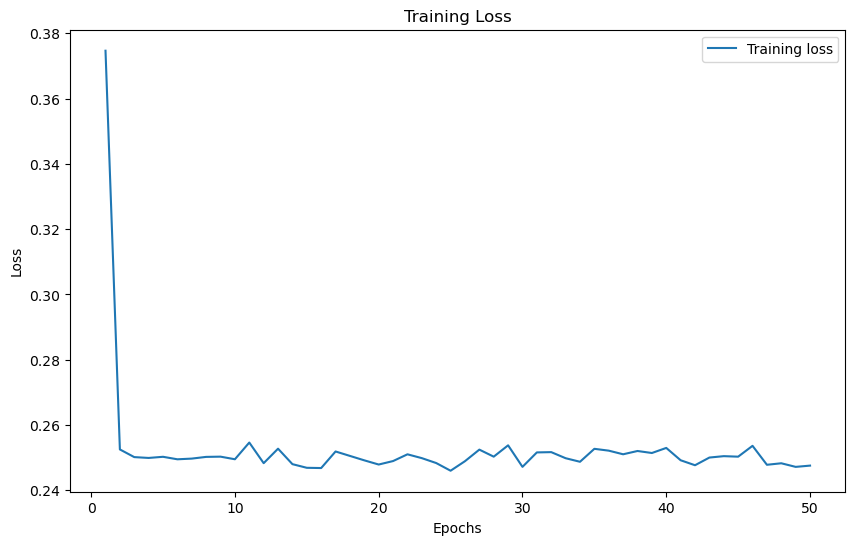

2. Learned parameters of the model:
  [array([[-0.08567604],
       [ 0.15276833],
       [-0.04567134],
       [ 0.06343614],
       [ 0.17129399]], dtype=float32), array([0.38756755], dtype=float32)]
3. The loss at the final epoch:  0.2475687712430954
4. The percentage loss between validation and training is:  4.39 % 


In [63]:
tf.random.set_seed(0)
# YOUR CODE HERE

model_sv2 = build_model(
        num_features=X_train_std.shape[1],
        learning_rate=.01)

# 3. Fit the model
baseline_fit_sv2 = model_sv2.fit(
      x = X_train_std,
      y = Y_train,
      validation_data=(X_val_std, Y_val),
      epochs=50,
      batch_size=1, #use all the data
      verbose=0)

loss_sv2 = baseline_fit_sv2.history['loss']
val_loss_sv2 = baseline_fit_sv2.history['val_loss']

epochs_sv2 = range(1, len(loss_sv2) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_sv2, loss_sv2, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('2. Learned parameters of the model:\n ', model_sv2.layers[0].get_weights())
print('3. The loss at the final epoch: ', loss_sv2[-1])
val_loss_sv2 = baseline_fit_sv2.history['val_loss'][-1]
percent = round(((val_loss_sv2 - loss_sv2[-1]) /loss_sv2[-1])*100,2)

# print(loss)
print('4. The percentage loss between validation and training is: ', percent, '% ')

In [64]:
train_loss_sv2, train_accuracy_sv2 = model_sv2.evaluate(X_train_std, Y_train, verbose = 0)
val_loss_sv2, val_accuracy_sv2 = model_sv2.evaluate(X_val_std, Y_val, verbose=0)
test_loss_sv2, test_accuracy_sv2 = model_sv2.evaluate(X_test_std, Y_test, verbose = 0)

print("Training Accuracy:", train_accuracy_sv2)
print("Validation Accuracy:", val_accuracy_sv2)
print("Test Accuracy:", test_accuracy_sv2)

if abs(train_accuracy_sv2 - test_accuracy_sv2) < 0.1:
    print("Yes, the model can be generalized.")
else:
    print("No, the model may not generalize well.")

Training Accuracy: 0.581632673740387
Validation Accuracy: 0.5596330165863037
Test Accuracy: 0.5963302850723267
Yes, the model can be generalized.


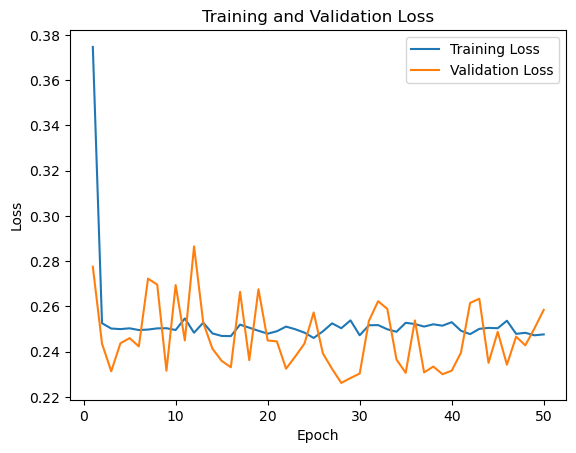

In [65]:
loss_train = baseline_fit_sv2.history['loss']
loss_val = baseline_fit_sv2.history['val_loss']
epoch = np.arange(1,len(loss_train)+1)
plt.plot(epoch,loss_train,label = 'Training Loss')
plt.plot(epoch,loss_val,label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Model #3 Logistic Regression

In [66]:
import tensorflow as tf

# Initialize the logistic regression model
num_features = X_train_std.shape[1]
learning_rate = 0.01

model_sv3 = tf.keras.Sequential()
model_sv3.add(tf.keras.layers.Dense(
    units=1,        # output dim
    input_shape=(num_features,),  # input dim
    use_bias=True,               # use a bias (intercept) param
    activation='sigmoid',
    kernel_initializer=tf.keras.initializers.GlorotUniform(),  # use a standard initializer
    bias_initializer=tf.keras.initializers.Ones(),    # initialize bias to 1
))

# Choose an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Compile the model
model_sv3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_sv3 = model_sv3.fit(X_train_std, Y_train, epochs=50, batch_size=8, validation_data=(X_val_std, Y_val), verbose=0)

# Model Summary
model_sv3.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [67]:
print("Evaluating the results now:")
# Evaluate the model on the training set
train_loss_sv3, train_accuracy_sv3 = model_sv3.evaluate(X_train_std, Y_train, verbose = 0)
print(f"Training Accuracy: {train_accuracy_sv3:.4f}")

# Evaluate the model on the validation set
val_loss_sv3, val_accuracy_sv3 = model_sv3.evaluate(X_val_std, Y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy_sv3:.4f}")

# Evaluate the model on the test set
test_loss_sv3, test_accuracy_sv3 = model_sv3.evaluate(X_test_std, Y_test,verbose=0)
print(f"Test Accuracy: {test_accuracy_sv3:.4f}")

if abs(train_accuracy_sv3 - test_accuracy_sv3) < 0.1:
    print("Yes, the model can be generalized.")
else:
    print("No, the model may not generalize well.")

Evaluating the results now:
Training Accuracy: 0.6000
Validation Accuracy: 0.6239
Test Accuracy: 0.5872
Yes, the model can be generalized.


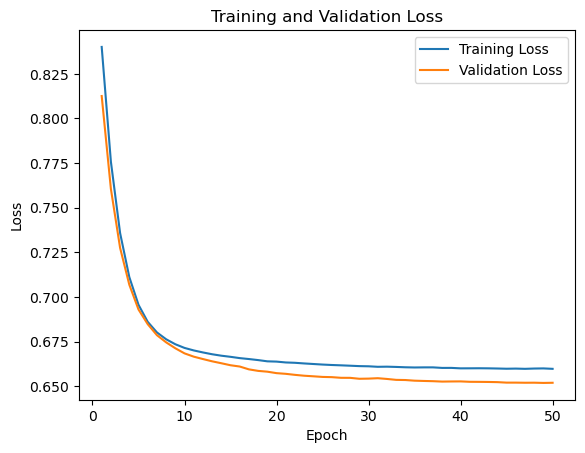

In [68]:
loss_train = history_sv3.history['loss']
loss_val = history_sv3.history['val_loss']
epoch = np.arange(1,len(loss_train)+1)
plt.plot(epoch,loss_train,label = 'Training Loss')
plt.plot(epoch,loss_val,label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Surabhi Code

The following models are trained on the following subset of attributes: Height, Weight, BMI, Vertical_Jump, and Broad_Jump

In [69]:
dataG = pd.read_csv('./NFL.csv')
dataG['Drafted'] = dataG['Drafted'].map({'Yes': 1, 'No': 0}).astype('int')
data = dataG[['Age', 'Bench_Press_Reps', 'Agility_3cone', 'BMI', 'Shuttle', 'Drafted']]
print(data['Drafted'].value_counts())
drop = data.dropna()
print(drop['Drafted'].value_counts())
drafted_1 = data[data['Drafted'] == 1]
drafted_0 = data[data['Drafted'] == 0]

drafted_1_sampled = drafted_1.sample(n=906, random_state=42)

balanced_data = pd.concat([drafted_1_sampled, drafted_0])

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data['Drafted'].value_counts())

Drafted
1    2254
0    1223
Name: count, dtype: int64
Drafted
1    1211
0     333
Name: count, dtype: int64
Drafted
0    1223
1     906
Name: count, dtype: int64


In [70]:
index = balanced_data.index.to_list()
print(balanced_data.shape)
shuffled_index = np.random.permutation(index)
print('Shuffled Index: ', shuffled_index)
balanced_data = balanced_data.reindex(shuffled_index)
balanced_data = balanced_data.dropna()
print(balanced_data.shape)

(2129, 6)
Shuffled Index:  [  53 1215 1483 ... 1461  256 1384]
(833, 6)


In [71]:


Y = balanced_data[['Drafted']]
print('Shape of Y: ', Y.shape)

X = balanced_data[['Age', 'Bench_Press_Reps', 'Agility_3cone', 'BMI', 'Shuttle']].dropna()
print('Shape of X: ', X.shape)



Shape of Y:  (833, 1)
Shape of X:  (833, 5)


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of Y_val: ", Y_val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (499, 5)
Shape of Y_train:  (499, 1)
Shape of X_val:  (167, 5)
Shape of Y_val:  (167, 1)
Shape of X_test:  (167, 5)
Shape of Y_test:  (167, 1)


In [73]:
X_train_quantiles = X_train.quantile([0.25, 0.5, 0.75, 0.95])

mean = X_train.mean()
std = X_train.std()
X_train_std = (X_train - mean) /std
X_val_std = (X_val - mean) /std
X_test_std = (X_test - mean) /std

mean = Y_train.mean()
std = Y_train.std()
Y_train_std = (Y_train - mean) /std
Y_val_std = (Y_val - mean) /std
Y_test_std = (Y_test - mean) /std

## SGD LR Model

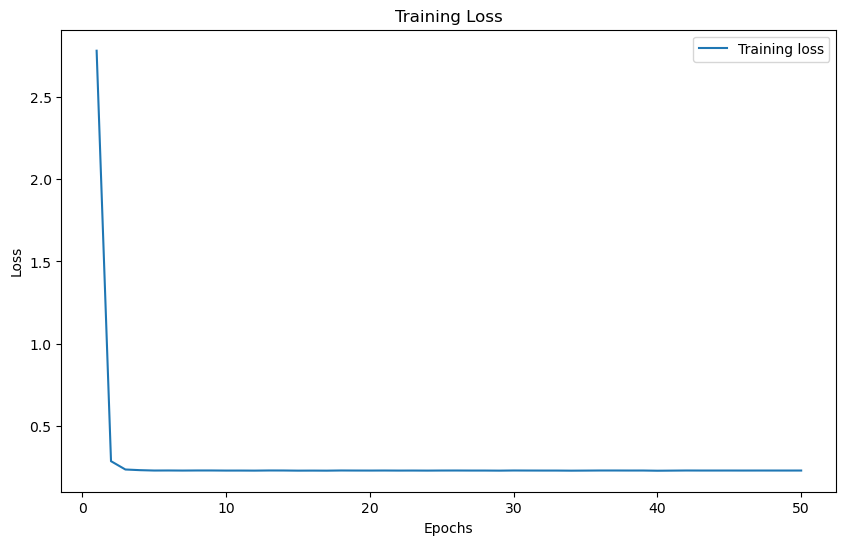

The loss at the final epoch:  0.22960184514522552
The percentage loss between validation and training is:  -4.66 % 


In [74]:
import tensorflow as tf
tf.random.set_seed(0)

tf.keras.backend.clear_session()
tf.random.set_seed(0)

model_sg1 = tf.keras.Sequential()
model_sg1.add(tf.keras.layers.Dense(
    units=1,        
    input_shape=[X_train_std.shape[1]],  
    use_bias=True,               
    kernel_initializer=tf.ones_initializer,  
    bias_initializer=tf.ones_initializer   
))

optimizer =  tf.keras.optimizers.SGD(learning_rate=.001)

model_sg1.compile(
    optimizer=optimizer,
    loss='mse', 
    metrics = ['accuracy']
)

baseline_fit_sg1 = model_sg1.fit(
      x = X_train_std,
      y = Y_train,
      validation_data=(X_val_std, Y_val),
      epochs=50,
      batch_size=1, 
      verbose=0)


loss_sg1 = baseline_fit_sg1.history['loss']
epochs_sg1 = range(1, len(loss_sg1) + 1)
#print(loss)

plt.figure(figsize=(10, 6))
plt.plot(epochs_sg1, loss_sg1, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('The loss at the final epoch: ', loss_sg1[-1])
val_loss_sg1 = baseline_fit_sg1.history['val_loss'][-1]
percent = round(((val_loss_sg1 - loss_sg1[-1]) /loss_sg1[-1])*100,2)

print('The percentage loss between validation and training is: ', percent, '% ')

In [75]:
weights, biases = model_sg1.layers[0].get_weights()
print('Weights:', weights)
print('Biases:', biases)

Weights: [[-0.03259006]
 [ 0.10858452]
 [-0.10971852]
 [ 0.02152736]
 [-0.00247721]]
Biases: [0.5902386]


In [76]:
train_loss_sg1, train_accuracy_sg1 = model_sg1.evaluate(X_train_std, Y_train, verbose = 0)
val_loss_sg1, val_accuracy_sg1 = model_sg1.evaluate(X_val_std, Y_val, verbose = 0)
test_loss_sg1, test_accuracy_sg1 = model_sg1.evaluate(X_test_std, Y_test, verbose = 0)

print("Training Accuracy:", train_accuracy_sg1)
print("Validation Accuracy:", val_accuracy_sg1)
print("Test Accuracy:", test_accuracy_sg1)

Training Accuracy: 0.6212424635887146
Validation Accuracy: 0.6347305178642273
Test Accuracy: 0.6467065811157227


## Adam LR Model

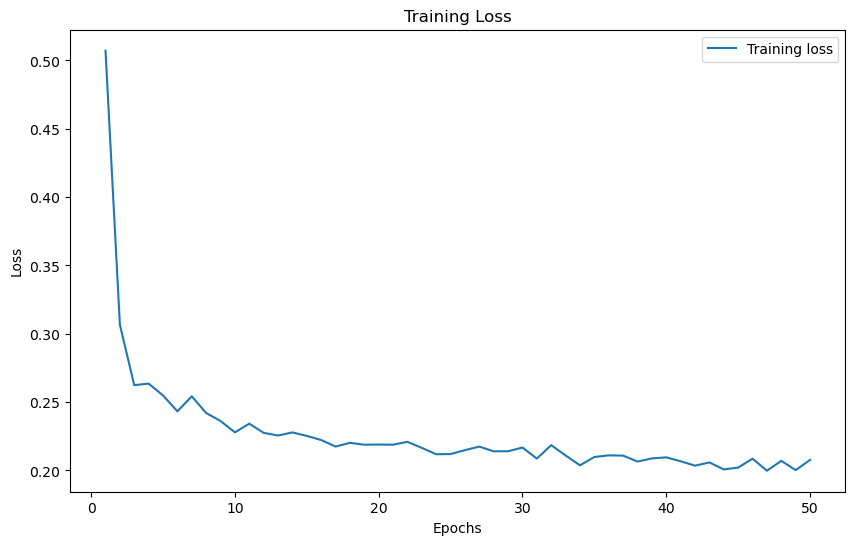

The loss at the final epoch:  0.20769384503364563
The percentage loss between validation and training is:  26.68 % 


In [77]:
tf.random.set_seed(0)

tf.keras.backend.clear_session()
tf.random.set_seed(0)

model_sg2 = tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, input_shape=[X_train_std.shape[1]], activation='relu',
                              kernel_initializer='he_normal', bias_initializer='zeros'),
        tf.keras.layers.Dense(units=1)
    ])

optimizer =  tf.keras.optimizers.Adam(learning_rate=.001)

model_sg2.compile(
    optimizer=optimizer,
    loss='mse', 
    metrics = ['accuracy']
)

baseline_fit_sg2 = model_sg2.fit(
      x = X_train_std,
      y = Y_train,
      validation_data=(X_val_std, Y_val),
      epochs=50,
      batch_size=1, 
      verbose=0)

loss_sg2 = baseline_fit_sg2.history['loss']
val_loss_sg2 = baseline_fit_sg2.history['val_loss']

epochs_sg2 = range(1, len(loss_sg2) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_sg2, loss_sg2, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('The loss at the final epoch: ', loss_sg2[-1])
val_loss_sg2 = baseline_fit_sg2.history['val_loss'][-1]
percent = round(((val_loss_sg2 - loss_sg2[-1]) /loss_sg2[-1])*100,2)

print('The percentage loss between validation and training is: ', percent, '% ')

In [78]:
weights, biases = model_sg2.layers[0].get_weights()
print('Weights:', weights)
print('Biases:', biases)

Weights: [[-0.5608204  -1.0372554   0.09207167  0.31311193 -0.09779899 -0.45411015
   0.7148925   0.31579173 -0.5297259  -0.24746828 -0.21898085 -0.24954847
   0.38729647 -0.1496877  -0.98413104 -1.2567782   1.089122   -0.06424439
   0.7504913   0.13005953  0.13430433  0.03602655 -0.44269702 -0.1985912
  -0.12469849  0.70550185  0.98242277 -0.04796493  0.03397904  0.61624515
  -0.82199043 -0.24698414  0.05115636  0.90495974 -0.52950525 -0.16694516
  -0.18038355  0.02985348 -0.36882702  0.49225762  0.31708342 -0.26171526
  -0.27155715 -0.3999016   0.05388866 -0.16195004  0.6042299  -0.9097206
   0.92456883 -0.7704981  -0.6887994  -0.9447197  -0.09289316  0.07774848
  -0.68455935 -1.1250845  -0.00976333 -0.31981122 -0.41739613  0.86060435
  -0.0231596  -0.23161405 -0.24207702 -0.13384505]
 [ 0.01419684 -1.2578862   1.2663875   0.33900023 -0.2928565   0.49854115
   0.09226142  0.9540384  -0.04496732 -0.13818273 -0.03113056 -1.112349
  -0.20739517 -0.31066704 -0.12797385 -0.43240863 -0.851

In [79]:
train_loss_sg2, train_accuracy_sg2 = model_sg2.evaluate(X_train_std, Y_train, verbose = 0)
val_loss_sg2, val_accuracy_sg2 = model_sg2.evaluate(X_val_std, Y_val, verbose = 0)
test_loss_sg2, test_accuracy_sg2 = model_sg2.evaluate(X_test_std, Y_test, verbose = 0)

print("Training Accuracy:", train_accuracy_sg2)
print("Validation Accuracy:", val_accuracy_sg2)
print("Test Accuracy:", test_accuracy_sg2)

Training Accuracy: 0.6993988156318665
Validation Accuracy: 0.5808383226394653
Test Accuracy: 0.6347305178642273


In [80]:
# Create a dictionary to store the results
Final_results = {
    'Model': ['AK Neural Network', 'AK Logistic Regression', 'AK CNN', 'AK Random Forest','JF Linear 1', 'JF Linear 2','JF Random Forest','SV Linear 1','SV Linear 2','SV Logistic 1','SG Linear 1','SG Logistic 1'],
    'Training Accuracy': [train_accuracy, train_accuracy2, train_accuracy3, train_accuracy4,train_accuracyj1,train_accuracyj2,train_accuracy_j3,train_accuracy_sv1,train_accuracy_sv2,train_accuracy_sv3,train_accuracy_sg1,train_accuracy_sg2 ],
    'Validation Accuracy': [val_accuracy, val_accuracy2, val_accuracy3, val_accuracy4,val_accuracyj1,val_accuracyj2,val_accuracy_j3,val_accuracy_sv1,val_accuracy_sv2,val_accuracy_sv3,val_accuracy_sg1,val_accuracy_sg2],
    'Test Accuracy': [test_accuracy, test_accuracy2, test_accuracy3, test_accuracy4,test_accuracyj1,test_accuracyj2,test_accuracy_j3,test_accuracy_sv1,test_accuracy_sv2,test_accuracy_sv3,test_accuracy_sg1,test_accuracy_sg2]
}

# Convert the dictionary to a DataFrame
Total_results_df = pd.DataFrame(Final_results)

# Display the DataFrame
Total_results_df

Model  Training Accuracy  Validation Accuracy  \
0        AK Neural Network           0.973059             0.795563   
1   AK Logistic Regression           0.641442             0.690967   
2                   AK CNN           1.000000             0.789223   
3         AK Random Forest           0.999208             0.873217   
4              JF Linear 1           0.518225             0.496038   
5              JF Linear 2           0.577655             0.572108   
6         JF Random Forest           0.943344             0.748019   
7              SV Linear 1           0.607143             0.458716   
8              SV Linear 2           0.581633             0.559633   
9            SV Logistic 1           0.600000             0.623853   
10             SG Linear 1           0.621242             0.634731   
11           SG Logistic 1           0.699399             0.580838   

    Test Accuracy  
0        0.793052  
1        0.628234  
2        0.777531  
3        0.846268  
4        0.497413  
5        0.562454  
6        0.763489  
7        0.596330  
8        0.596330  
9        0.587156  
10       0.646707  
11       0.634731

## Game Plan

### Jenna 5 , SV 9 , SG11, NN 1